In [103]:
import numpy as np
import datetime
import time
import os

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Set plot appearance
# See here for more options: https://matplotlib.org/users/customizing.html
%config InlineBackend.figure_format='retina'
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize'] = (9, 6)
plt.rcParams['axes.labelpad'] = 10
sns.set_style("darkgrid")
# sns.set_context("poster", font_scale=1.0)

# Ignore warnings (for seaborn's kdeplot)
# import warnings
# warnings.filterwarnings('ignore')

In [104]:
import warnings
warnings.filterwarnings('ignore')

---
# Human Resources Strategy
## Training a predictive model for employee attrition

Managing employee attrition is important and necessary to maintain retention (thereby manage high recruiting costs). Attrition affects employee morale and performance, which can have measurable consequence to the business. 

---

In [206]:
%%bash
head hr_data.csv

satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,is_smoker,department,salary
0.38,0.53,2,157,3,0,yes,0,,sales,low
0.8,0.86,5,262,6,0,yes,0,yes,sales,medium
0.11,0.88,7,272,4,0,yes,0,,sales,medium
0.72,0.87,5,223,5,0,yes,0,,sales,low
0.37,0.52,2,,,0,yes,0,no,sales,low
0.41,0.5,2,,,0,yes,0,,sales,low
0.1,0.77,6,247,4,0,yes,0,,sales,low
0.92,0.85,5,259,5,0,yes,0,,sales,low
0.89,1,5,224,5,0,yes,0,,sales,low


In [207]:
import pandas as pd

# Read in the data
hr = pd.read_csv('hr_data.csv')

In [208]:
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'is_smoker', 'department', 'salary'],
      dtype='object')

In [209]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,is_smoker,department,salary
0,0.38,0.53,2,157.0,3.0,0,yes,0,NaN,sales,low
1,0.80,0.86,5,262.0,6.0,0,yes,0,yes,sales,medium
2,0.11,0.88,7,272.0,4.0,0,yes,0,NaN,sales,medium
3,0.72,0.87,5,223.0,5.0,0,yes,0,NaN,sales,low
4,0.37,0.52,2,NaN,NaN,0,yes,0,no,sales,low


In [210]:
hr.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,is_smoker,department,salary
14994,0.40,0.57,2,151.0,3.0,0,yes,0,NaN,support,low
14995,0.37,0.48,2,160.0,3.0,0,yes,0,NaN,support,low
14996,0.37,0.53,2,143.0,3.0,0,yes,0,NaN,support,low
14997,0.11,0.96,6,280.0,4.0,0,yes,0,NaN,support,low
14998,0.37,0.52,2,158.0,3.0,0,yes,0,NaN,support,low


In [211]:
# How many lines in the original CSV (including the header row)
with open('hr_data.csv') as f:
    print(len(f.read().splitlines()))

15000


In [212]:
# ... yet how many lines in the dataset
len(hr)

14999

Model objective will be the categorical variable `left` as our response. Let's explore it further. 

In [213]:
# How much missing data in the response target vaiable?
hr.left.isnull().sum()

0

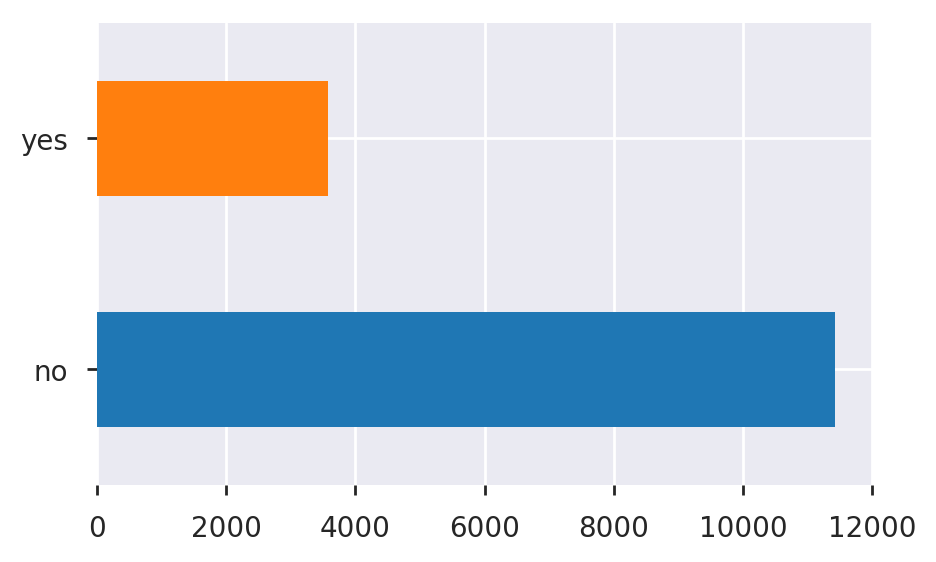

In [214]:
# Assess how this response variable `left` is distributed, visually
fig, ax = plt.subplots(figsize=(5, 3))
hr.left.value_counts().plot('barh');

In [215]:
# Dataset column types
hr.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours     float64
time_spend_company       float64
work_accident              int64
left                      object
promotion_last_5years      int64
is_smoker                 object
department                object
salary                    object
dtype: object

In [216]:
hr.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14631.0,200.958376,50.002307,96.00,156.00,200.00,245.00,310.0
time_spend_company,14848.0,3.494141,1.458976,2.00,3.00,3.00,4.00,10.0
work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [217]:
# This is important. Modift the data to convert Categorical variables as such.
hr.left = pd.Categorical(hr.left)
hr.dtypes

satisfaction_level        float64
last_evaluation           float64
number_project              int64
average_montly_hours      float64
time_spend_company        float64
work_accident               int64
left                     category
promotion_last_5years       int64
is_smoker                  object
department                 object
salary                     object
dtype: object

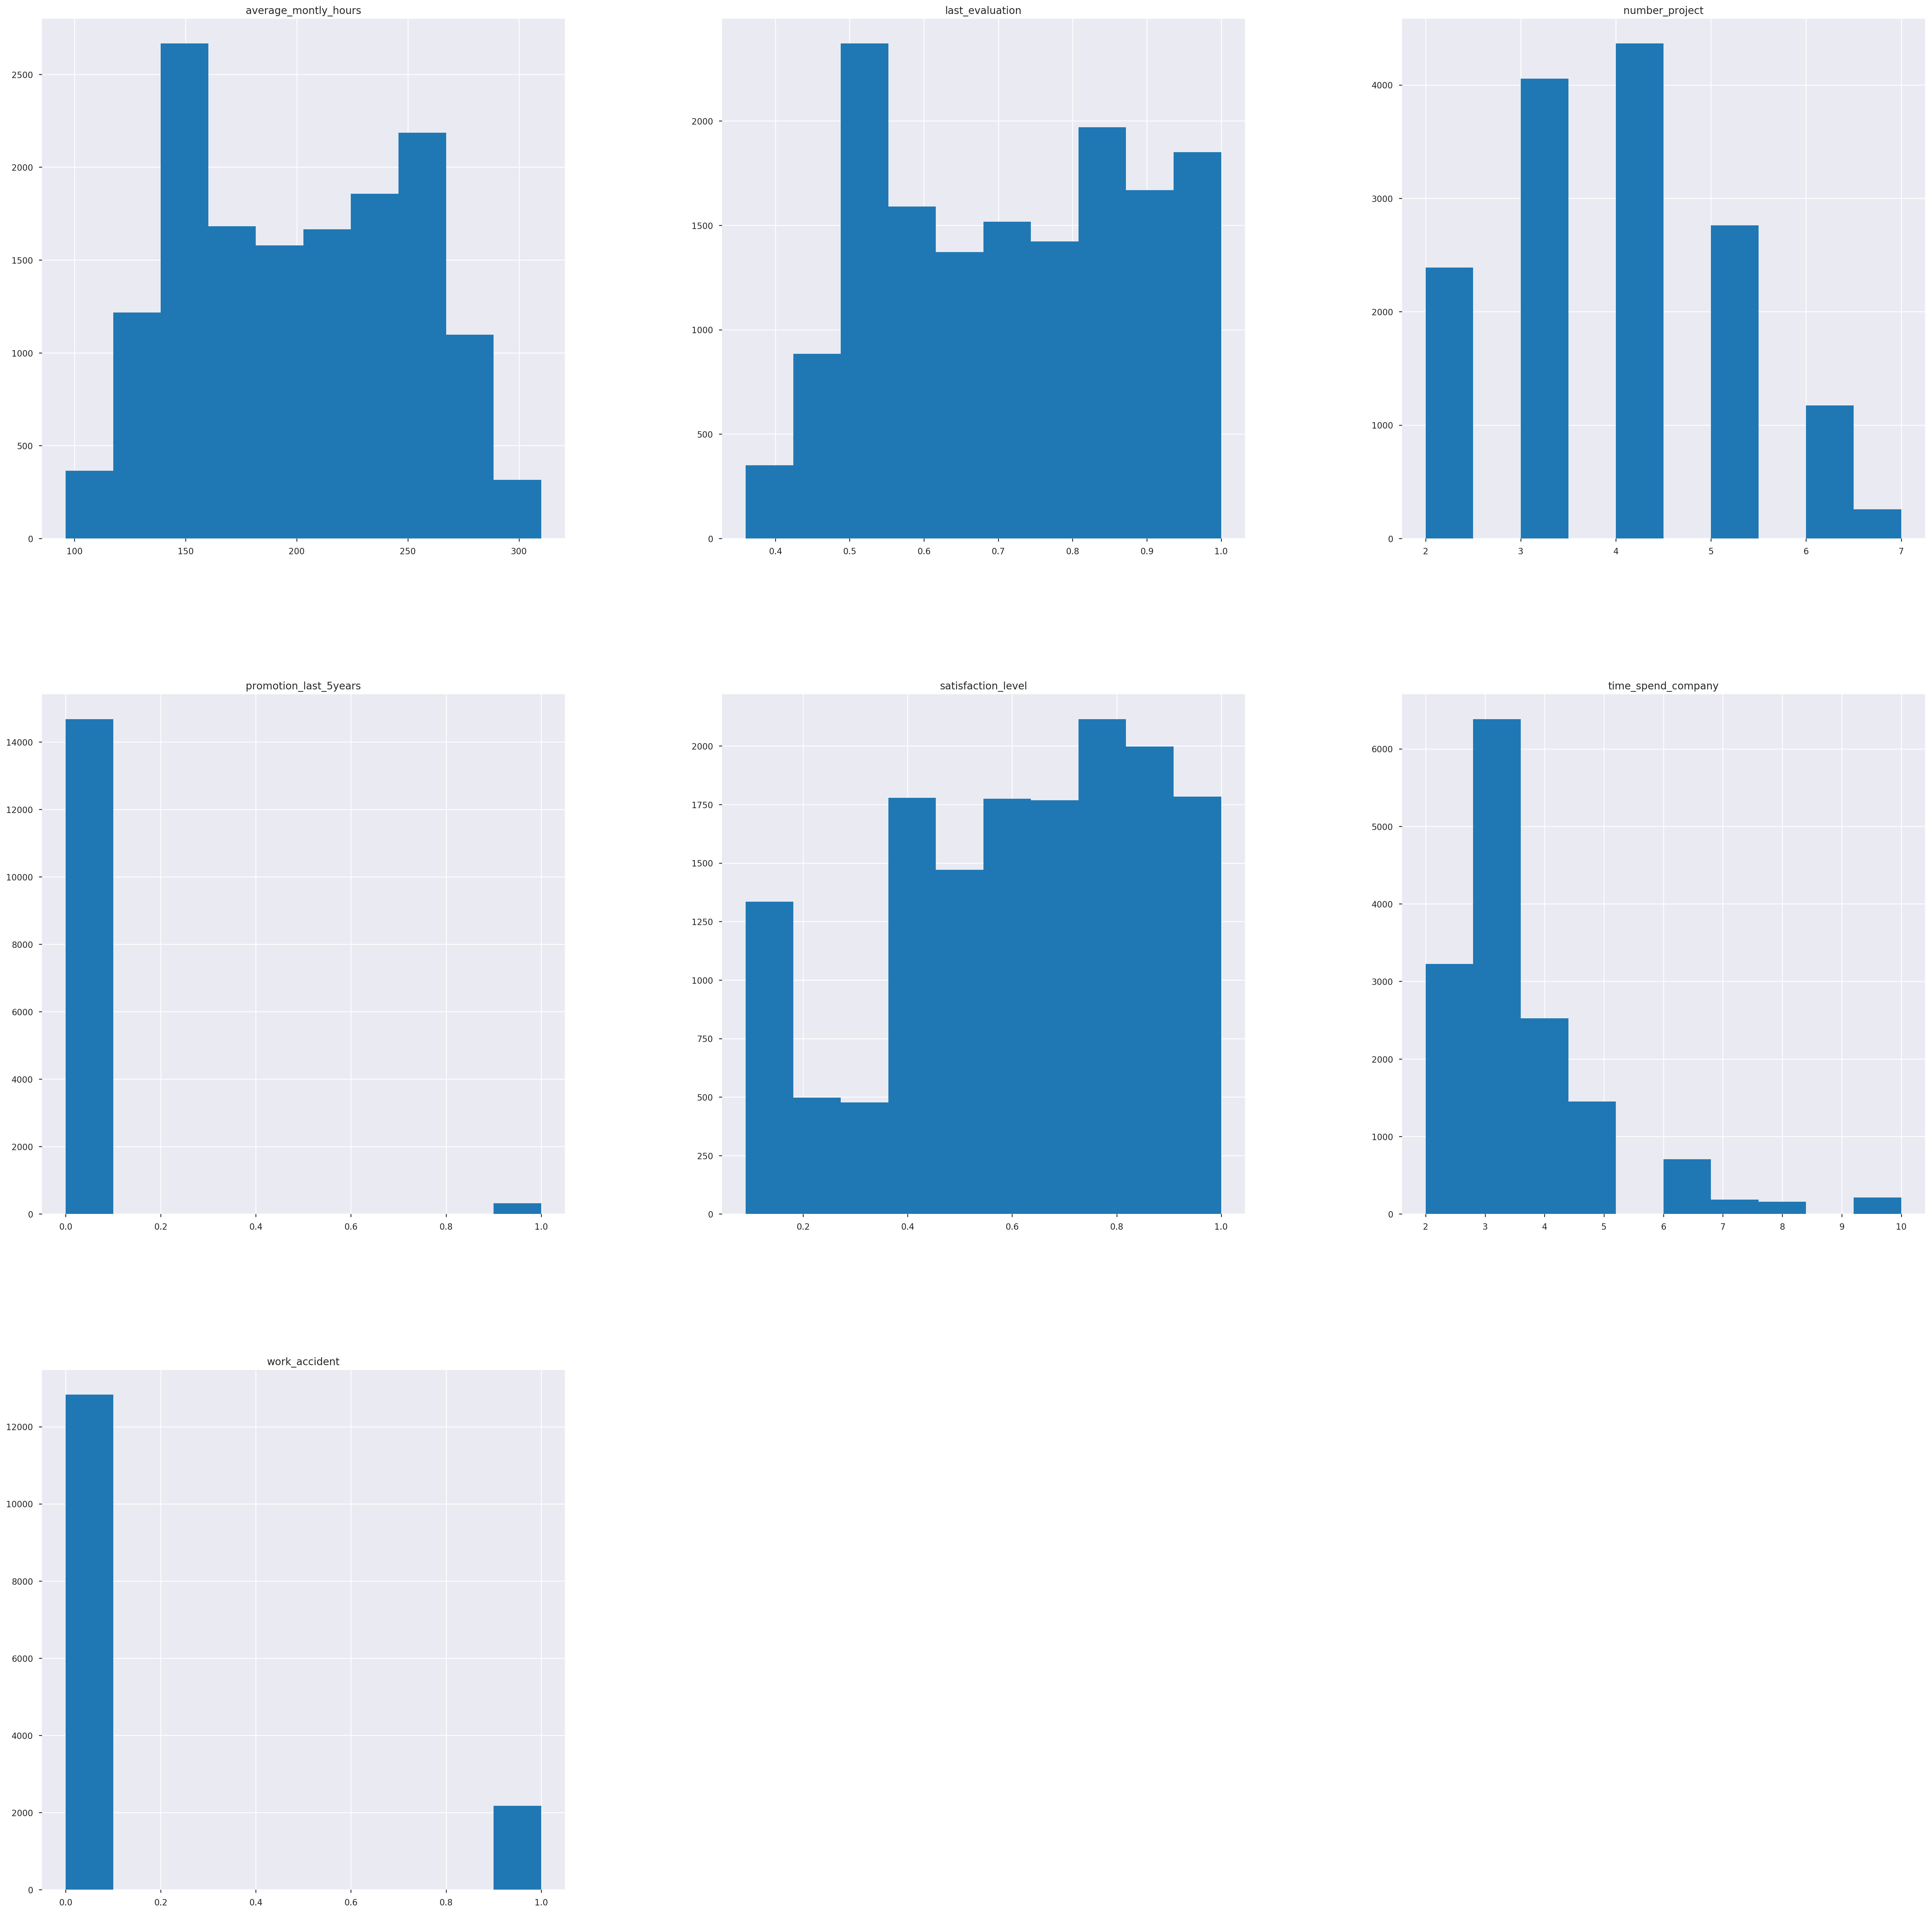

In [218]:
# Plot histograms for each variable
hr.hist(figsize = (40, 40))
plt.show()

## If necessary, toggle the scroll window in the main menu of the notebook: 
## Cell -> Current Outputs -> Toggle Scrolling

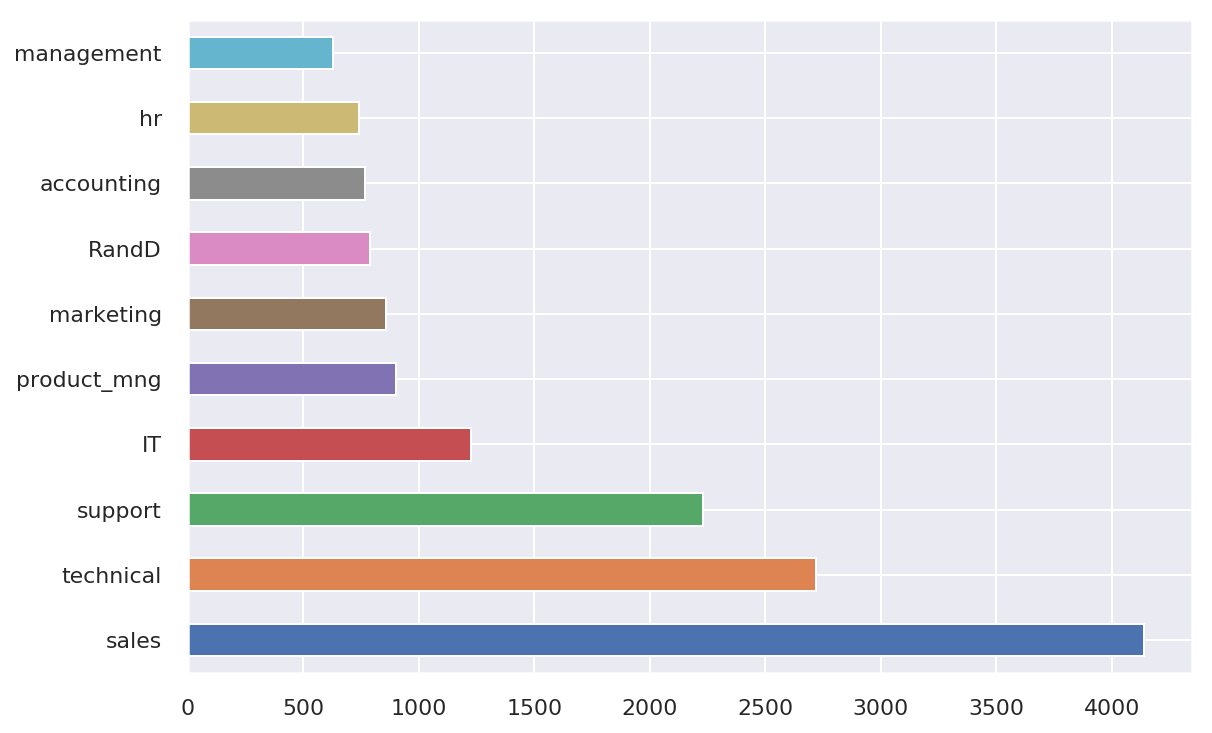

In [118]:
hr.department.value_counts().plot('barh');

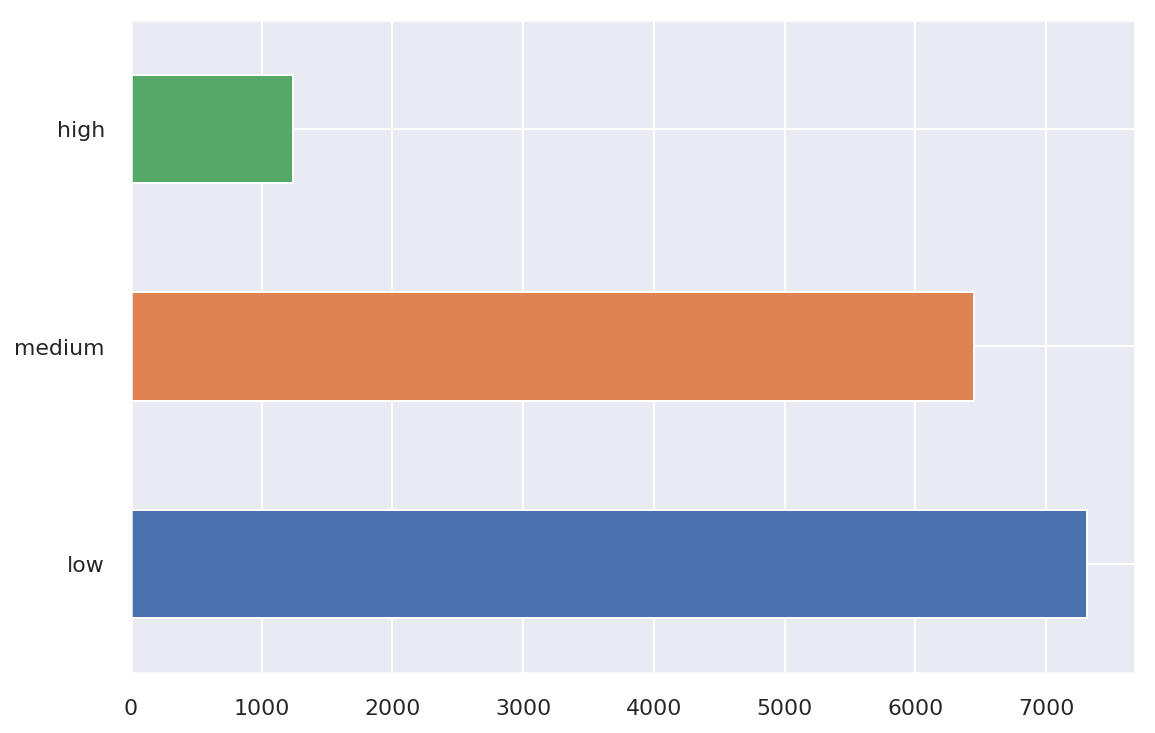

In [119]:
hr.salary.value_counts().plot('barh');

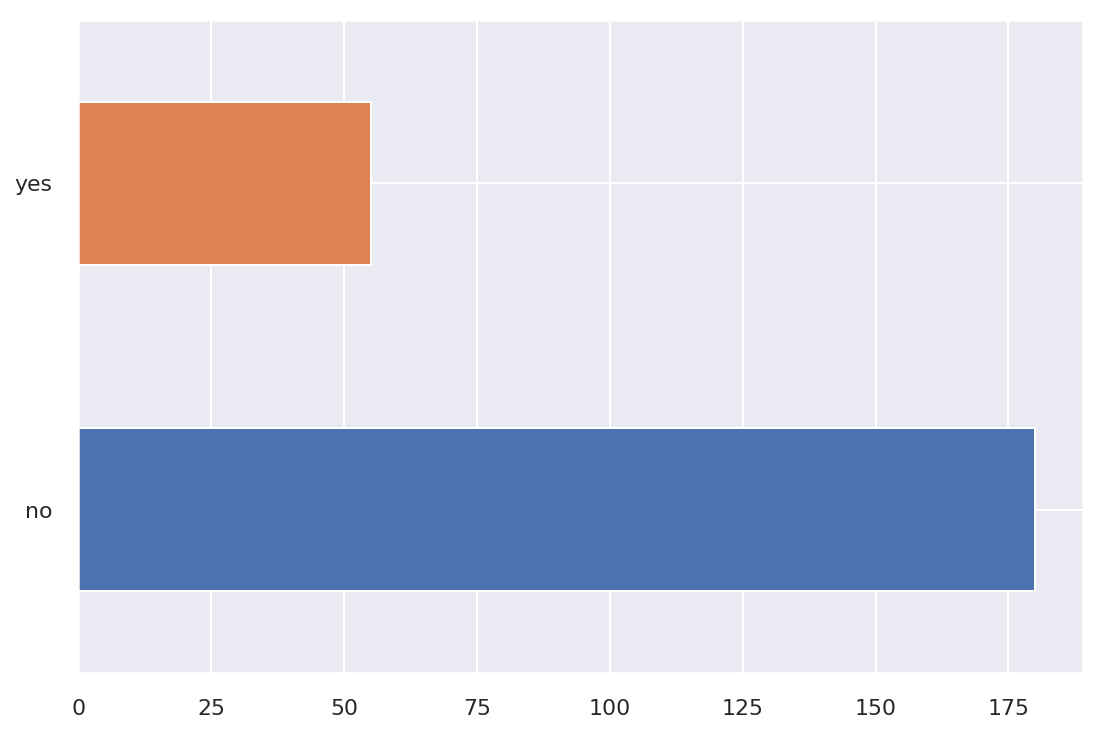

In [120]:
hr.is_smoker.value_counts().plot('barh');

In [219]:
import pandas_profiling

pandas_profiling.ProfileReport(hr)

Number of variables,11
Number of observations,14999
Total Missing (%),9.3%
Total size in memory,1.2 MiB
Average record size in memory,81.0 B
Numeric,5
Categorical,4
Boolean,2
Date,0
Text (Unique),0
Rejected,0


---

## Feature engineering

#1 `is_smoker`

In [122]:
# Confirm is_smoker has far too many NaN's compared to the other features
hr.isnull().sum() / len(hr) * 100

satisfaction_level        0.000000
last_evaluation           0.000000
number_project            0.000000
average_montly_hours      2.453497
time_spend_company        1.006734
work_accident             0.000000
left                      0.000000
promotion_last_5years     0.000000
is_smoker                98.433229
department                0.000000
salary                    0.000000
dtype: float64

In [123]:
# Remove is_smoker feature
del hr['is_smoker']

#2 `time_spend_company` has 1% missing values. Let's assume that a reasonable method for "fixing" these missing values is to replace it with the median of its other values. 

In [124]:
fill_value = hr.time_spend_company.median()
hr.time_spend_company = hr.time_spend_company.fillna(fill_value)

In [125]:
hr.isnull().sum() / len(hr) * 100

satisfaction_level       0.000000
last_evaluation          0.000000
number_project           0.000000
average_montly_hours     2.453497
time_spend_company       0.000000
work_accident            0.000000
left                     0.000000
promotion_last_5years    0.000000
department               0.000000
salary                   0.000000
dtype: float64

#3 finally, we can make a smarter adjustment to resolve the missing vales in `average_montly_hours`

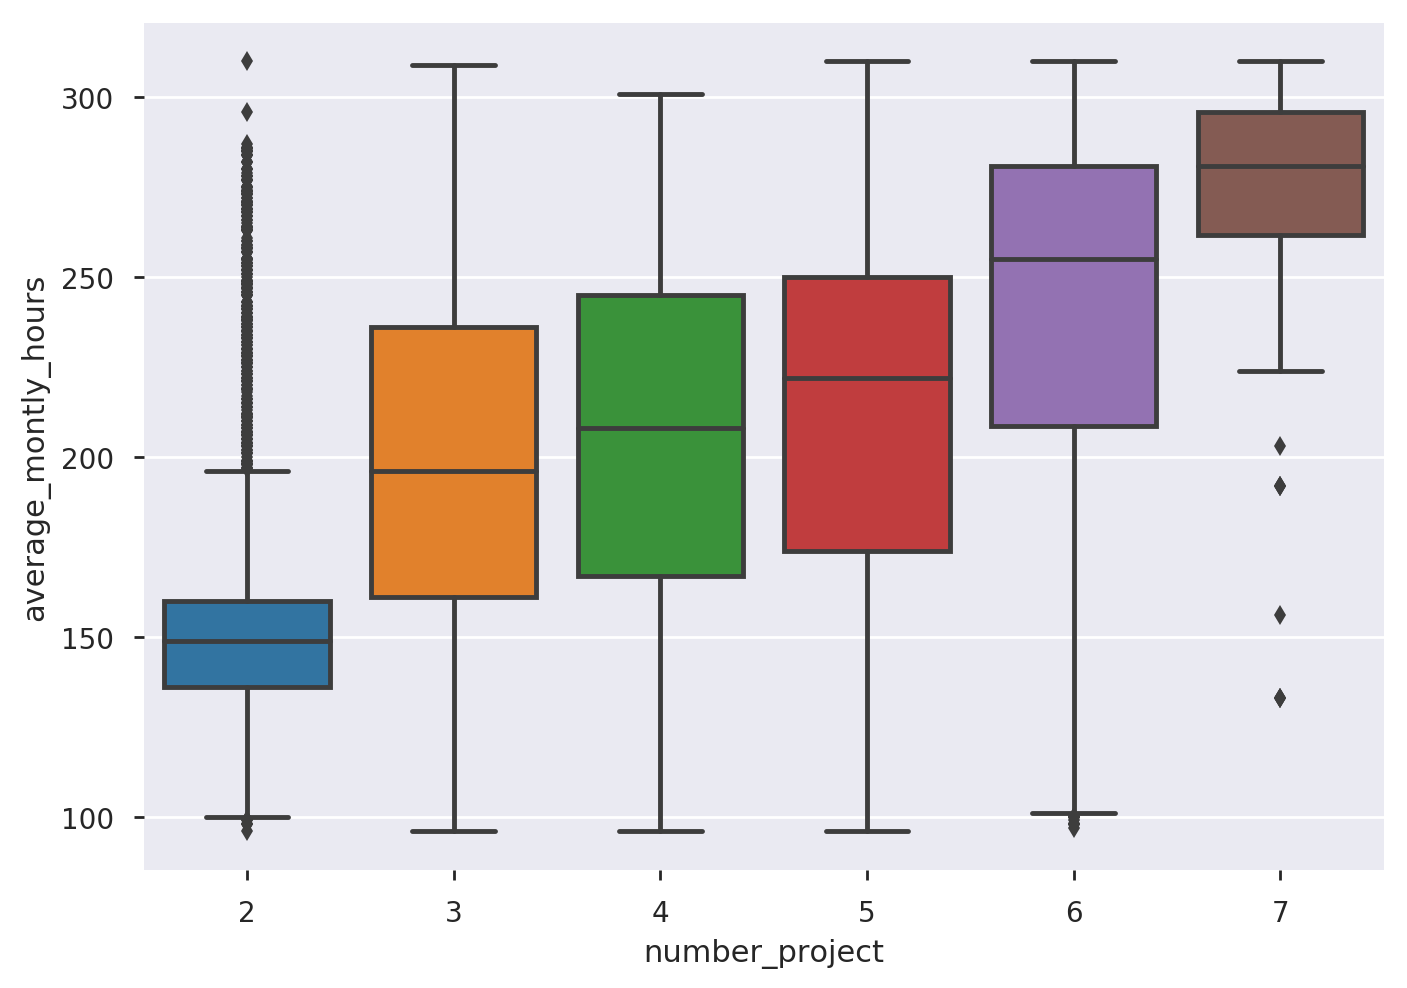

In [126]:
# How does average_montly_hours depend on number_project?

sns.boxplot(x='number_project', y='average_montly_hours', data=hr)

In [127]:
# Calculate fill values for average_montly_hours

mean_per_project = hr.groupby('number_project')\
                    .average_montly_hours.mean()
mean_per_project = dict(mean_per_project)
mean_per_project

{2: 160.16353543979506,
 3: 197.47882323104236,
 4: 205.07858315740089,
 5: 211.99962839093274,
 6: 238.73947368421054,
 7: 276.015873015873}

In [128]:
# Fill average_monthly_hours with the appropriate values

fill_values_hours = hr.number_project.map(mean_per_project)

In [129]:
fill_values_hours.describe()

count    14999.000000
mean       200.992489
std         22.439432
min        160.163535
25%        197.478823
50%        205.078583
75%        211.999628
max        276.015873
Name: number_project, dtype: float64

In [130]:
hr.average_montly_hours = hr.average_montly_hours.fillna(fill_values_hours)

In [131]:
hr.average_montly_hours.describe()

count    14999.000000
mean       200.992489
std         49.492423
min         96.000000
25%        156.000000
50%        200.000000
75%        244.000000
max        310.000000
Name: average_montly_hours, dtype: float64

In [220]:
# Confirm that we are all clear of NaN's -- if True, `assert` should not give an error 
assert hr.isnull().sum().sum() == 0

AssertionError: 

In [221]:
# Convert categorical features of the response variable `left` to a binary integer representation
hr.left = hr.left.map({'no': 0, 'yes': 1})

In [222]:
hr.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

This next step involving one-hot encoding is especially important for Deep Learning, as neural network activation functions require numeric values. 

In [135]:
# One-hot encoding --> convert the other categorical features `department` & `salary` into binary integers matrices  
hr = pd.get_dummies(hr)

In [136]:
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department_IT', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

In [137]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157.000000,3.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262.000000,6.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272.000000,4.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223.000000,5.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,160.163535,3.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [138]:
# Save to file
hr.to_csv('hr_data_processed.csv', index=False)

---
## Building Classification Models

In [139]:
# Set default figure size
plt.rcParams['figure.figsize'] = (8, 8)

### Bivariate plots to see interactions between select feature variables (using Seaborn)

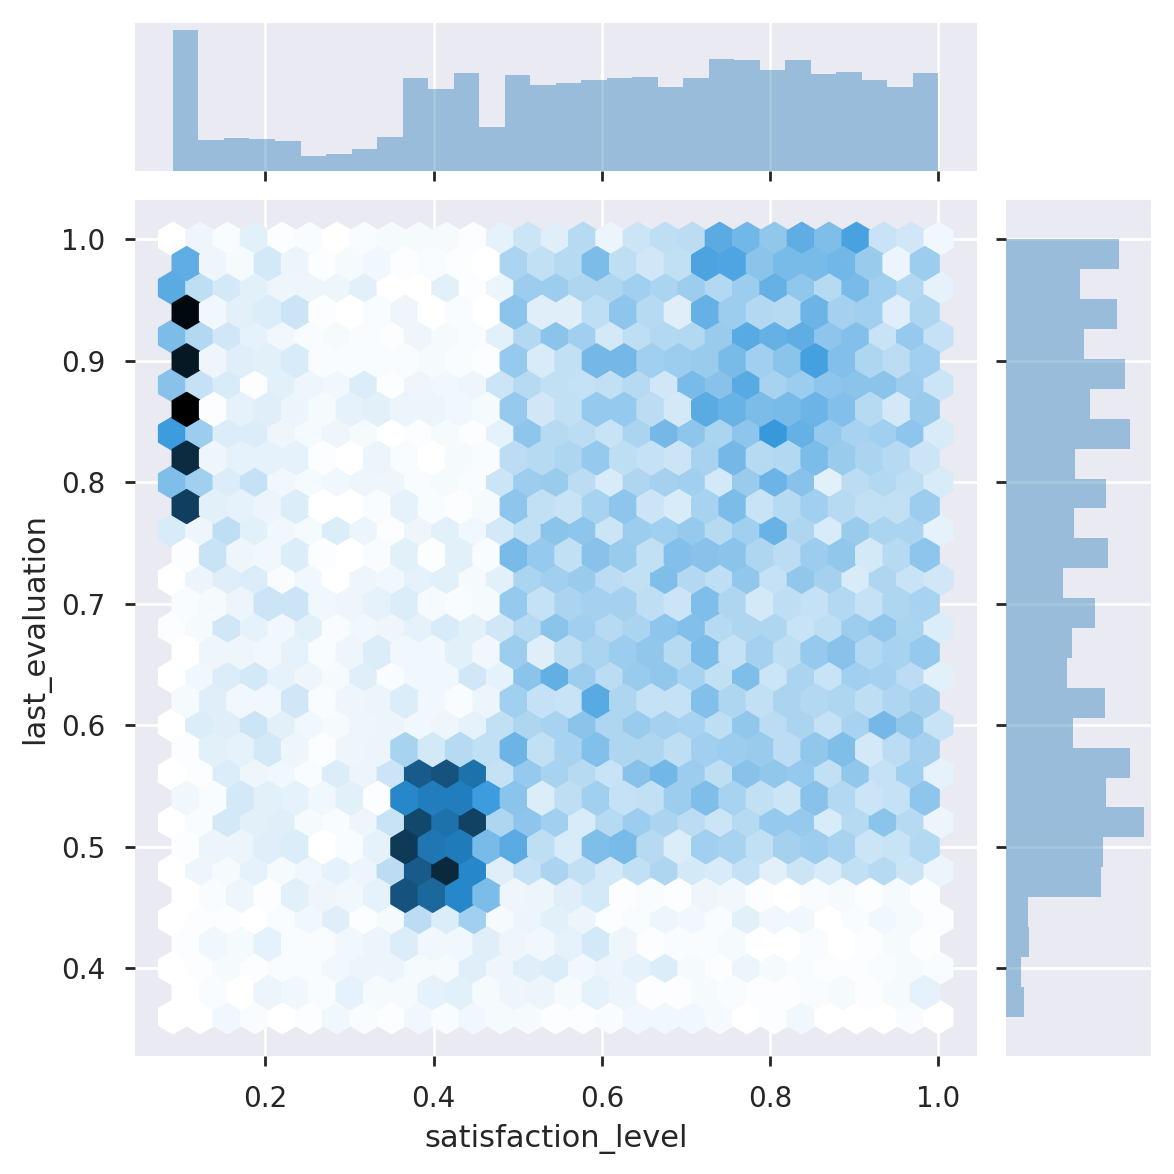

In [140]:
# The two features we'll use for training in this section
sns.jointplot('satisfaction_level', 'last_evaluation', data=hr, kind='hex')

Text(0.25, 1.05, 'left = 1')

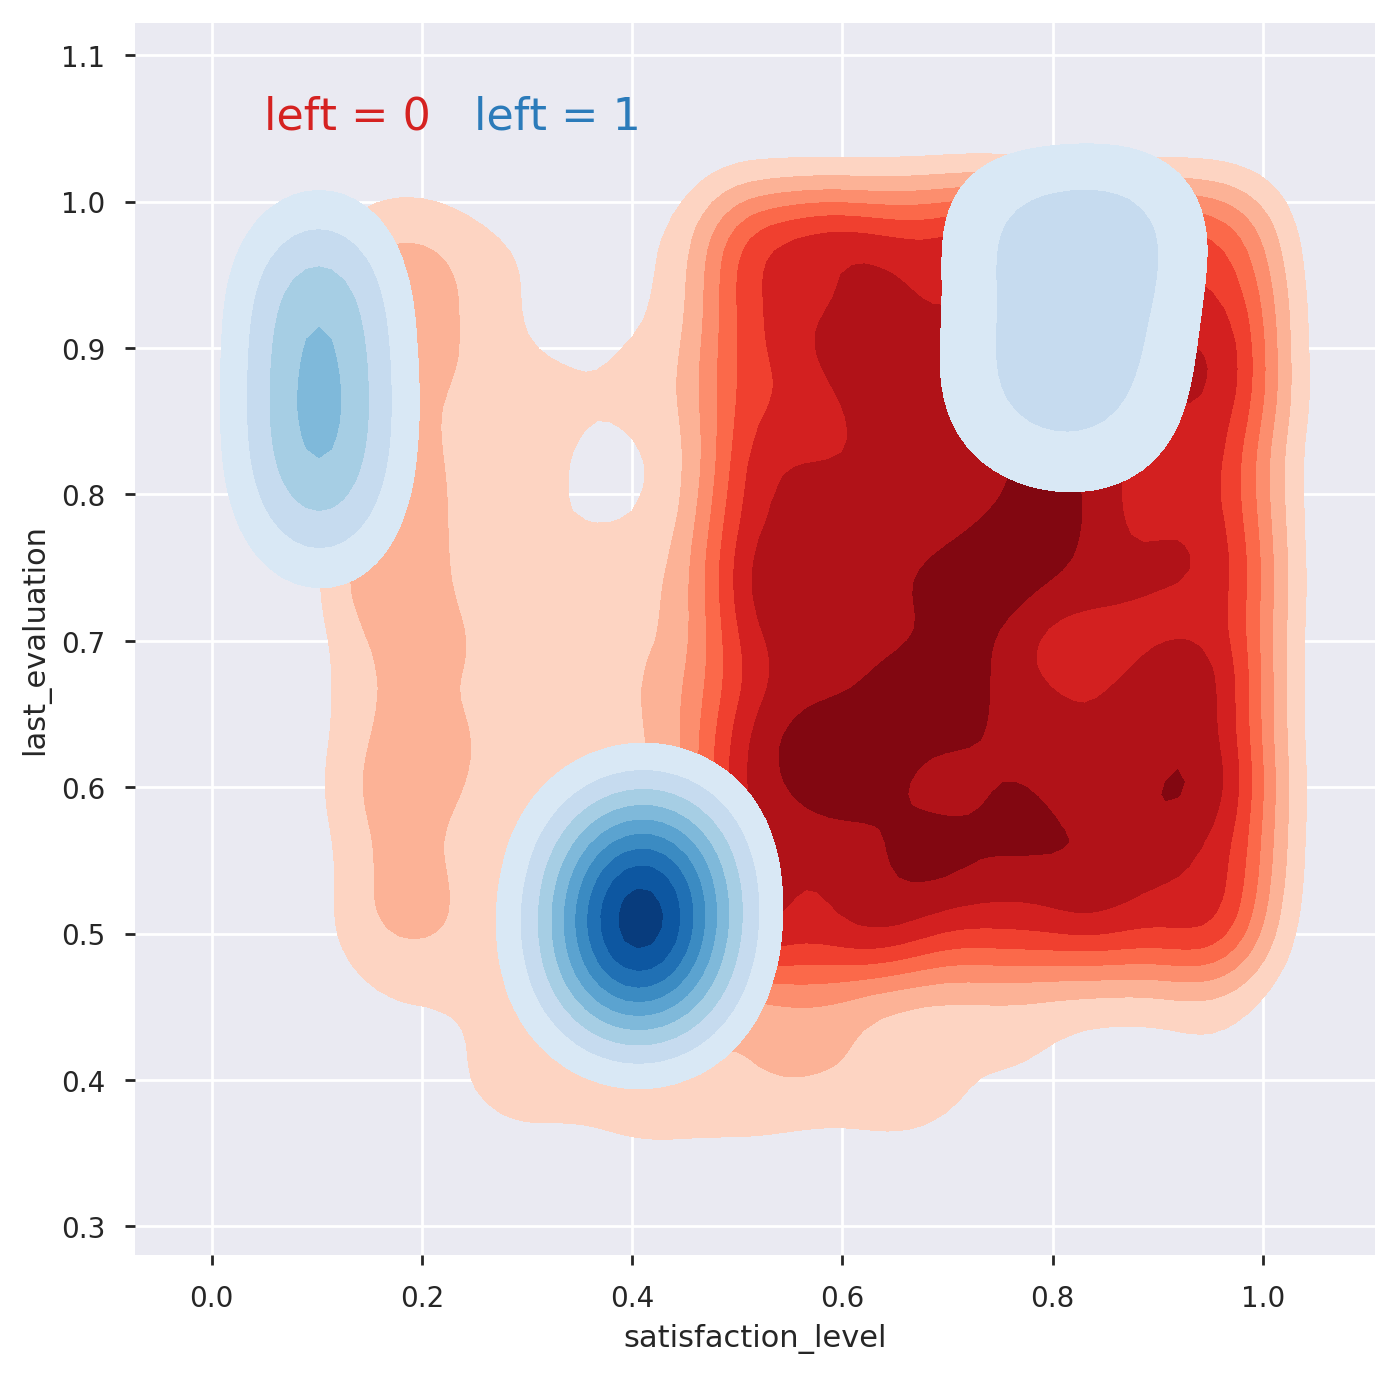

In [141]:
# segment the above plot with the response variable `left`
fig, ax = plt.subplots()
plot_args = dict(shade=True, shade_lowest=False)
for i, c in zip((0, 1), ('Reds', 'Blues')):
    sns.kdeplot(hr.loc[hr.left==i, 'satisfaction_level'],
                hr.loc[hr.left==i, 'last_evaluation'],
                cmap=c, **plot_args)
ax.text(0.05, 1.05, 'left = 0', size=16, color=sns.color_palette('Reds')[-2])
ax.text(0.25, 1.05, 'left = 1', size=16, color=sns.color_palette('Blues')[-2])

Text(0.25, 1.05, 'left = 1')

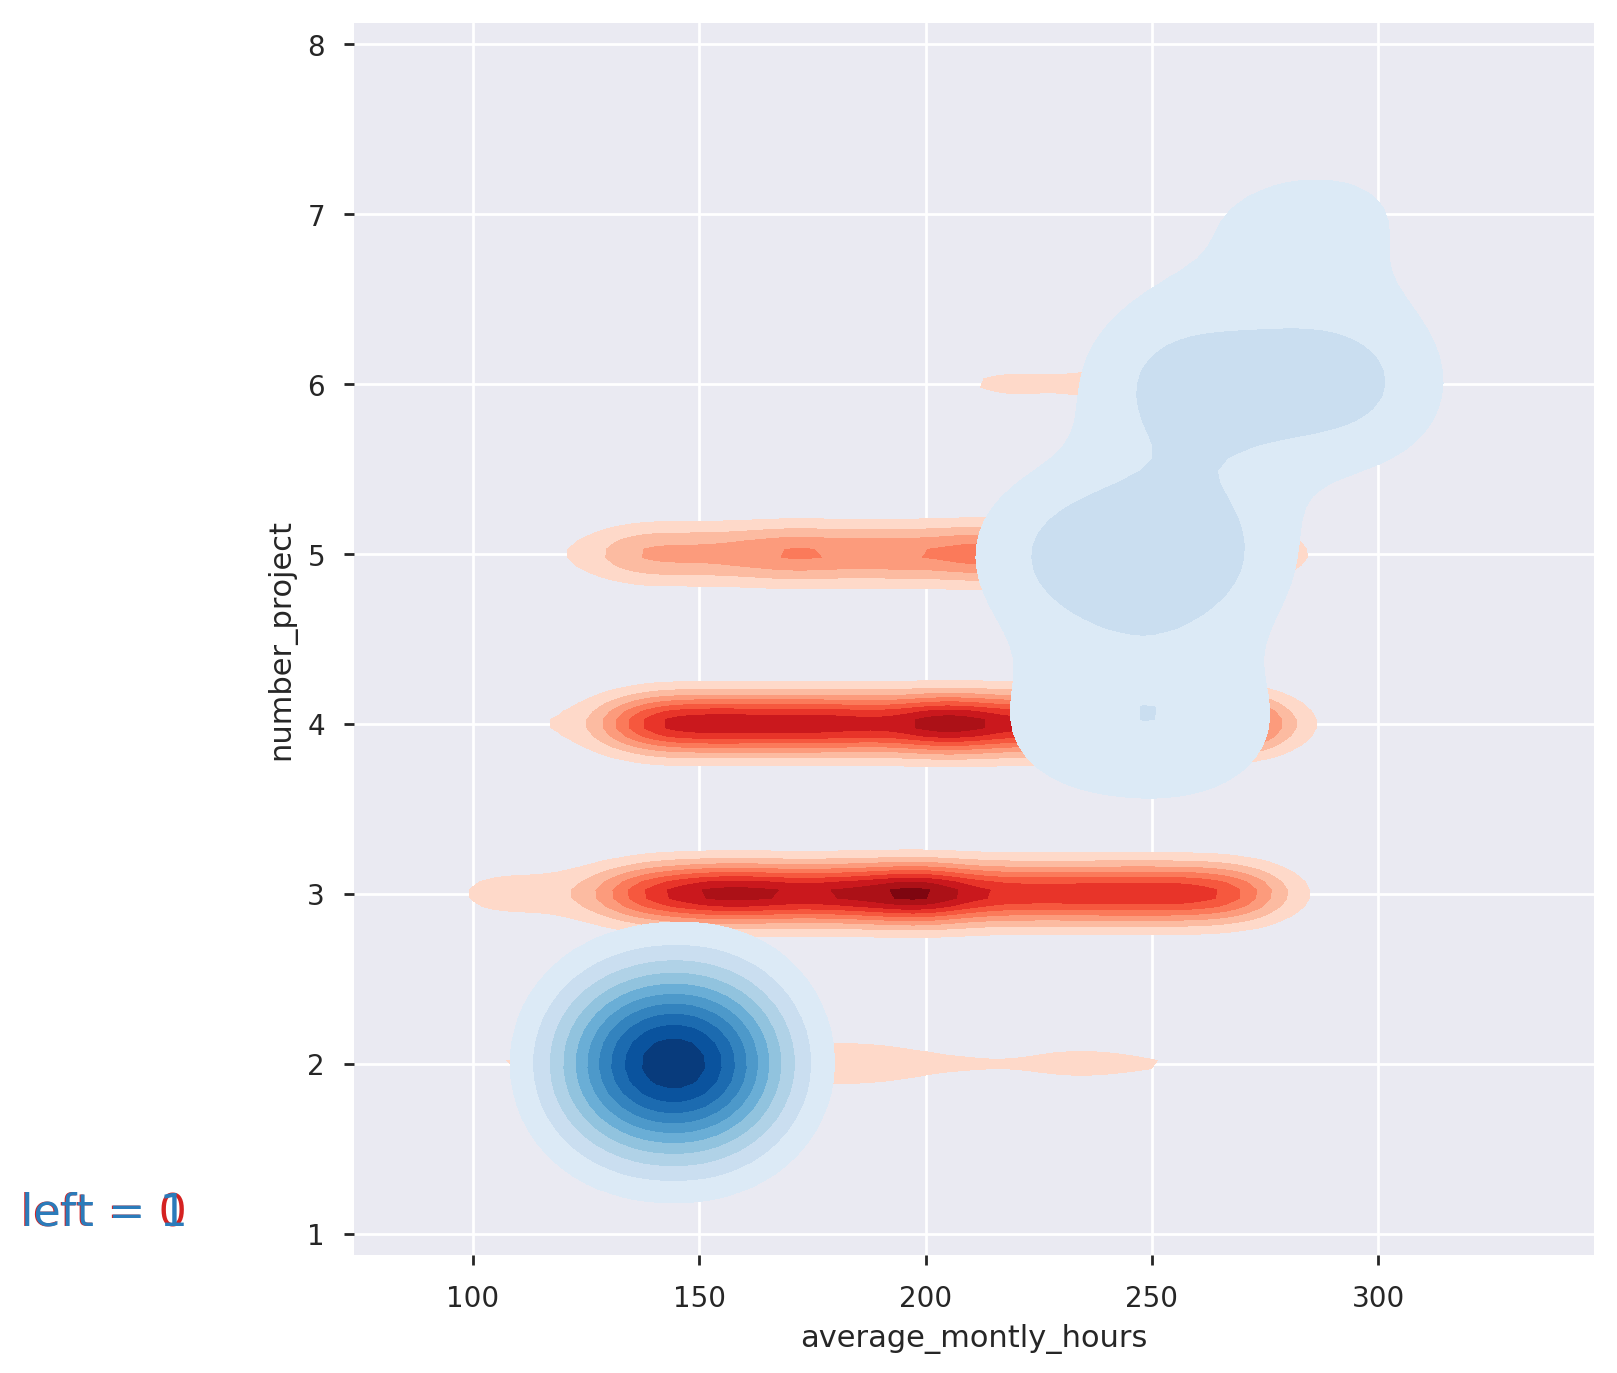

In [142]:
# segment the above plot with the response variable `left`
fig, ax = plt.subplots()
plot_args = dict(shade=True, shade_lowest=False)
for i, c in zip((0, 1), ('Reds', 'Blues')):
    sns.kdeplot(hr.loc[hr.left==i, 'average_montly_hours'],
                hr.loc[hr.left==i, 'number_project'],
                cmap=c, **plot_args)
ax.text(0.05, 1.05, 'left = 0', size=16, color=sns.color_palette('Reds')[-2])
ax.text(0.25, 1.05, 'left = 1', size=16, color=sns.color_palette('Blues')[-2])

In [223]:
# Split the data into training and testing sets

from sklearn.model_selection import train_test_split

features = ['satisfaction_level', 'last_evaluation']
X_train, X_test, y_train, y_test = train_test_split(
    hr[features].values, hr['left'].values,
    test_size=0.15, random_state=42)

In [224]:
# Scale the data for SVMs and K-Nearest Neighbors

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [225]:
# Train a support vector machine classifier (SVC)

from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1, random_state=42)
svm.fit(X_train_std, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=42,
  shrinking=True, tol=0.001, verbose=False)

In [226]:
# What is this SVC's classification accuracy?

from sklearn.metrics import accuracy_score

y_pred = svm.predict(X_test_std)
acc = accuracy_score(y_test, y_pred)
print('accuracy = {:.1f}%'.format(acc*100))

accuracy = 76.4%


We predict the targets for our test samples and then use scikit-learn's accuracy_score function to determine the accuracy. 

The result looks promising at ~76%! Not bad for our first model. Recall, though, the target variable is imbalanced between left = 0 & 1. Let's see how accurate the predictions are for each class.

In [227]:
# What is this SVC's accuracy by class, i.e., by `left` categories? While this metric sounds simple, it is a statistically questionable concept. 

from sklearn.metrics import confusion_matrix

print('percent accuracy score per class:')
cmat = confusion_matrix(y_test, y_pred)
scores = cmat.diagonal() / cmat.sum(axis=1) * 100
print('left = 0 : {:.2f}%'.format(scores[0]))
print('left = 1 : {:.2f}%'.format(scores[1]))

percent accuracy score per class:
left = 0 : 100.00%
left = 1 : 0.00%


Terrible - it looks like the model is simply classifying every sample as 0, which is clearly not helpful at all. 

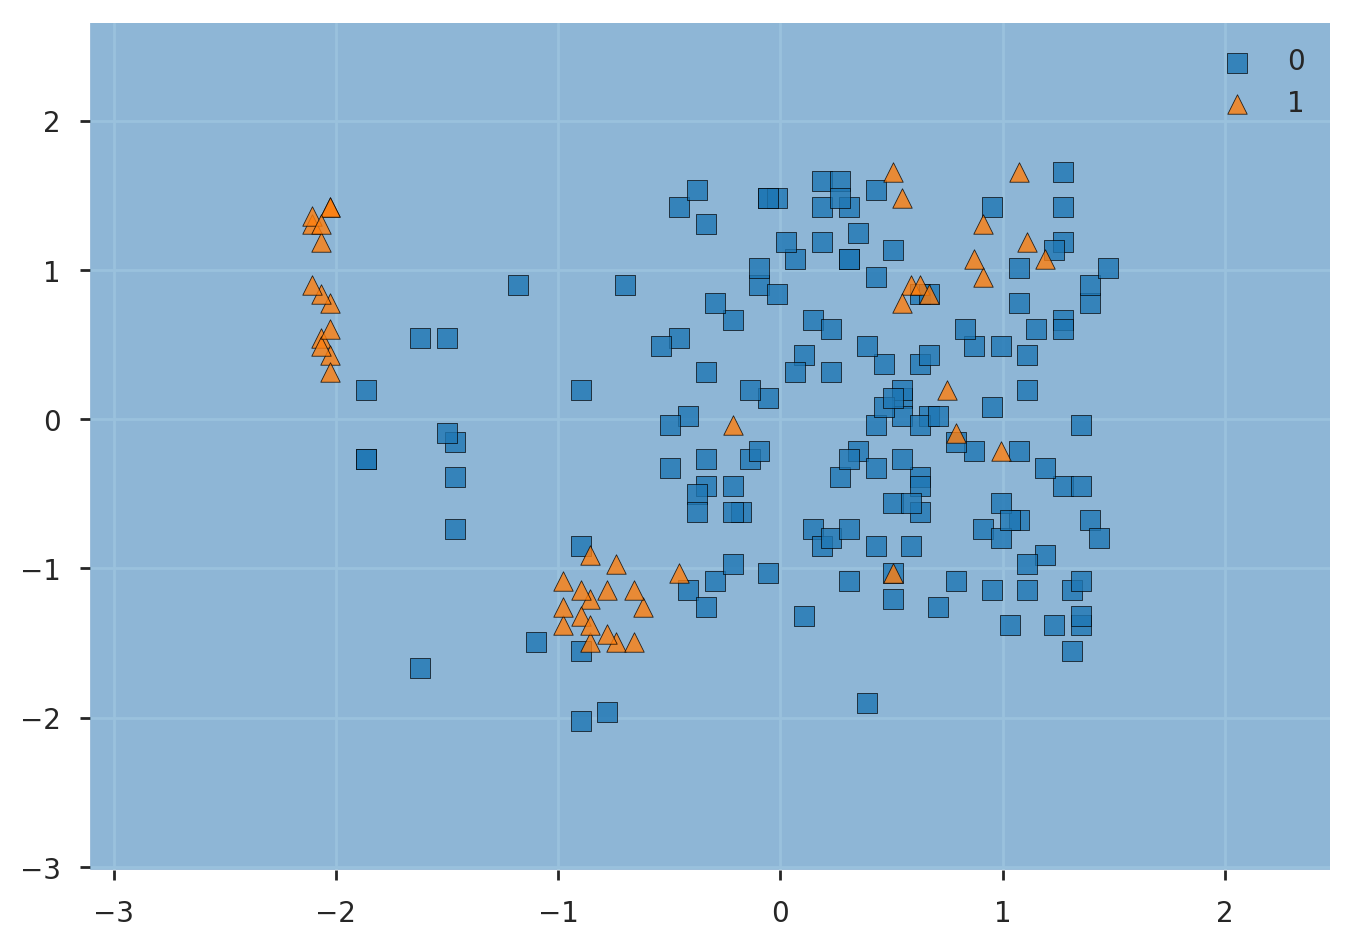

In [228]:
# Plot the resulting decision regions

from mlxtend.plotting import plot_decision_regions

N_samples = 200
X, y = X_train_std[:N_samples], y_train[:N_samples]
plot_decision_regions(X, y, clf=svm);

The `mlxtend` package plots decision regions along with a set of samples passed as arguments. In order to see the decision regions properly without too many samples obstructing our view, we pass only a 200-sample subset of the test data to its `plot_decision_regions` function. 

<p>In this case, of course, it does not matter. We see the resulting shaded region is <i>entirely</i> blue, indicating every point in the feature space would be classified as 0.

It shouldn't be surprising that a linear model can't do a good job of describing these nonlinear patterns. So let's re-run the SVC with `kernel = 'rbf'`, <i>i.e.</i>, we are running the support vector classifier (SVC) using its  radial basis function kernel (RBF). 

In [229]:
# Train a kernel SVM

svm = SVC(kernel='rbf', C=1, random_state=1)
svm.fit(X_train_std, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=1,
  shrinking=True, tol=0.001, verbose=False)

In [230]:
# What is this kernel SVM's classification accuracy? Compare with SVC accuracy score above. 

from sklearn.metrics import accuracy_score

y_pred = svm.predict(X_test_std)
acc = accuracy_score(y_test, y_pred)
print('accuracy = {:.1f}%'.format(acc*100))

accuracy = 90.0%


As expected, the nonlinear parameter performs much better than linear for our data. Keep in mind that `rbf` is often called a kernel trick with SVCs to get better model performance. Now let's plot the results visually.

In [231]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from IPython.display import display
from mlxtend.plotting import plot_decision_regions

def check_model_fit(clf, X_test, y_test):
    # Print overall test-set accuracy
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred, normalize=True) * 100
    print('total accuracy = {:.1f}%'.format(acc))
    
    # Print confusion matrix
    cmat = confusion_matrix(y_test, y_pred)
    cols = pd.MultiIndex.from_tuples([('predictions', 0), ('predictions', 1)])
    indx = pd.MultiIndex.from_tuples([('actual', 0), ('actual', 1)])
    display(pd.DataFrame(cmat, columns=cols, index=indx))
    print()
    
    # Print test-set accuracy grouped by the target variable 
    print('percent accuracy score per class:')
    cmat = confusion_matrix(y_test, y_pred)
    scores = cmat.diagonal() / cmat.sum(axis=1) * 100
    print('left = 0 : {:.2f}%'.format(scores[0]))
    print('left = 1 : {:.2f}%'.format(scores[1]))
    print()
    
    # Plot decision regions
    fig = plt.figure(figsize=(8, 8))
    N_samples = 200
    X, y = X_test[:N_samples], y_test[:N_samples]
    plot_decision_regions(X, y, clf=clf)
    
    plt.xlabel('satisfaction_level')
    plt.ylabel('last_evaluation')
    plt.legend(loc='upper left')

total accuracy = 90.0%


predictions     
                   0    1
actual 0        1672   48
       1         176  354


percent accuracy score per class:
left = 0 : 97.21%
left = 1 : 66.79%



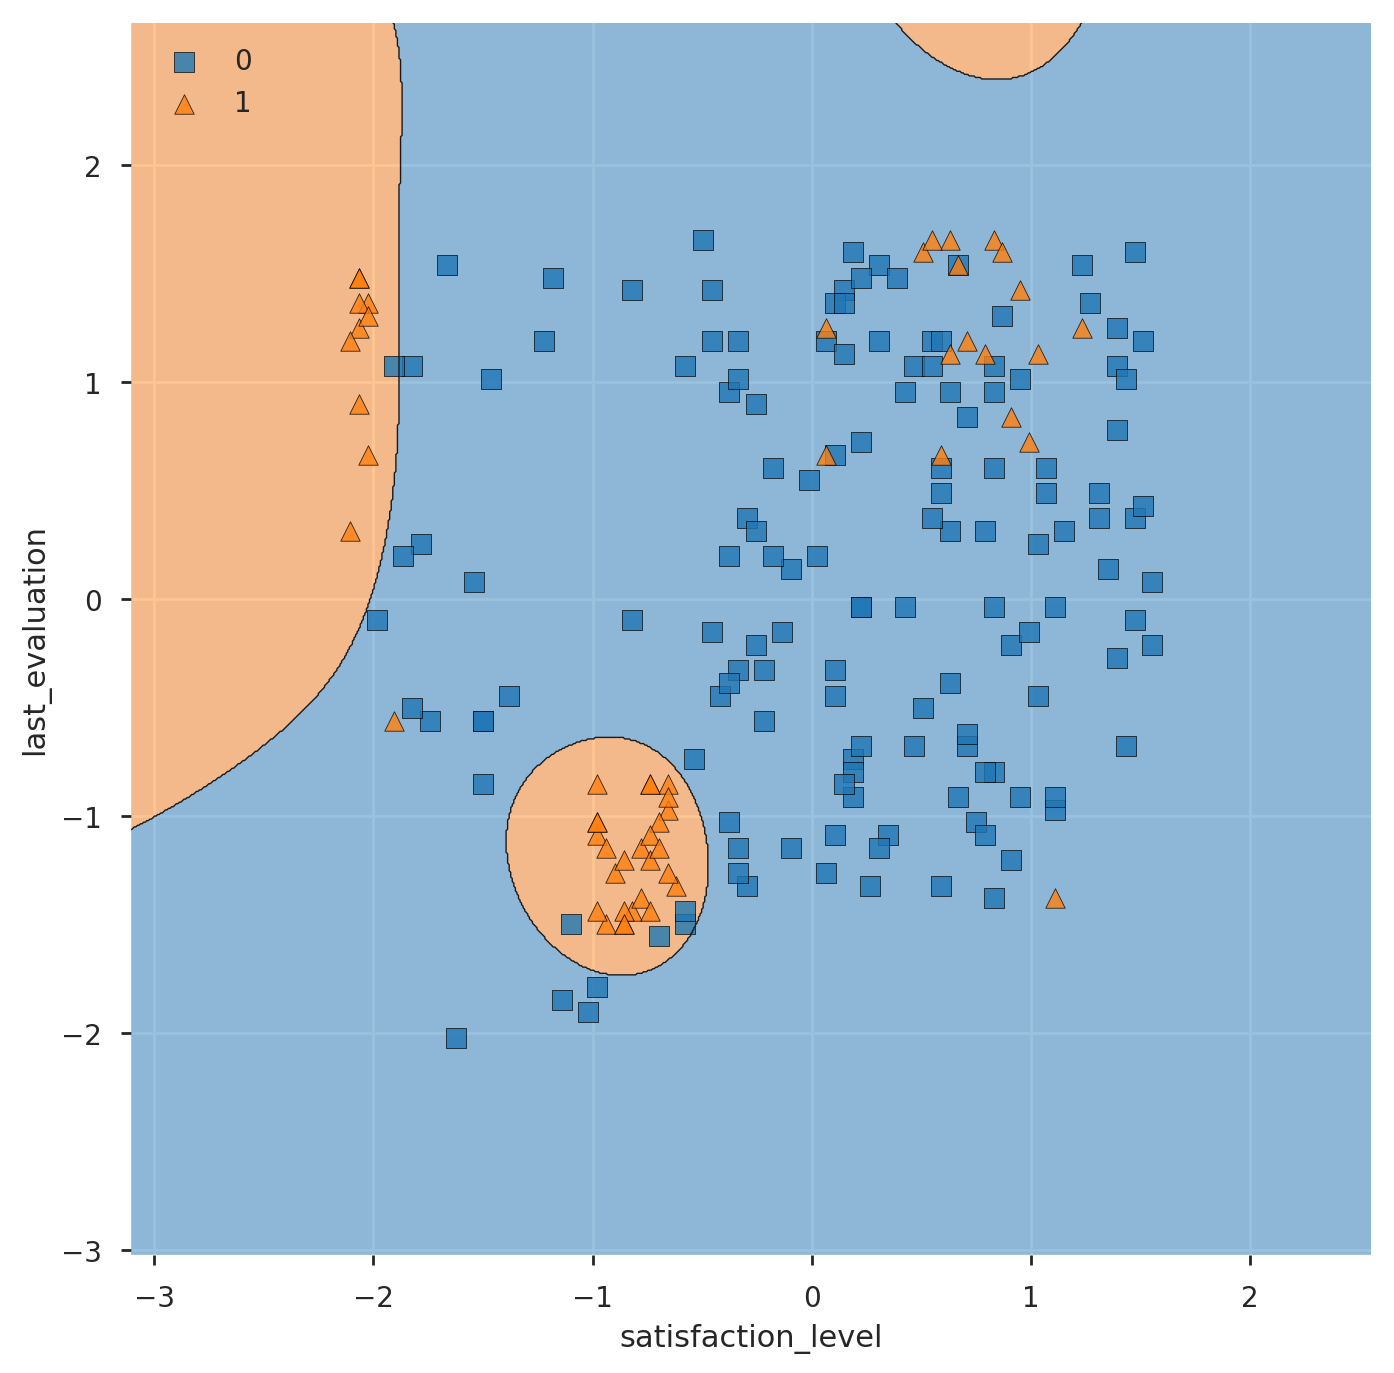

In [232]:
check_model_fit(svm, X_test_std, y_test)

### Building a K-Nearest Neighbors (KNN) Classifier

total accuracy = 90.6%


predictions     
                   0    1
actual 0        1622   98
       1         113  417


percent accuracy score per class:
left = 0 : 94.30%
left = 1 : 78.68%



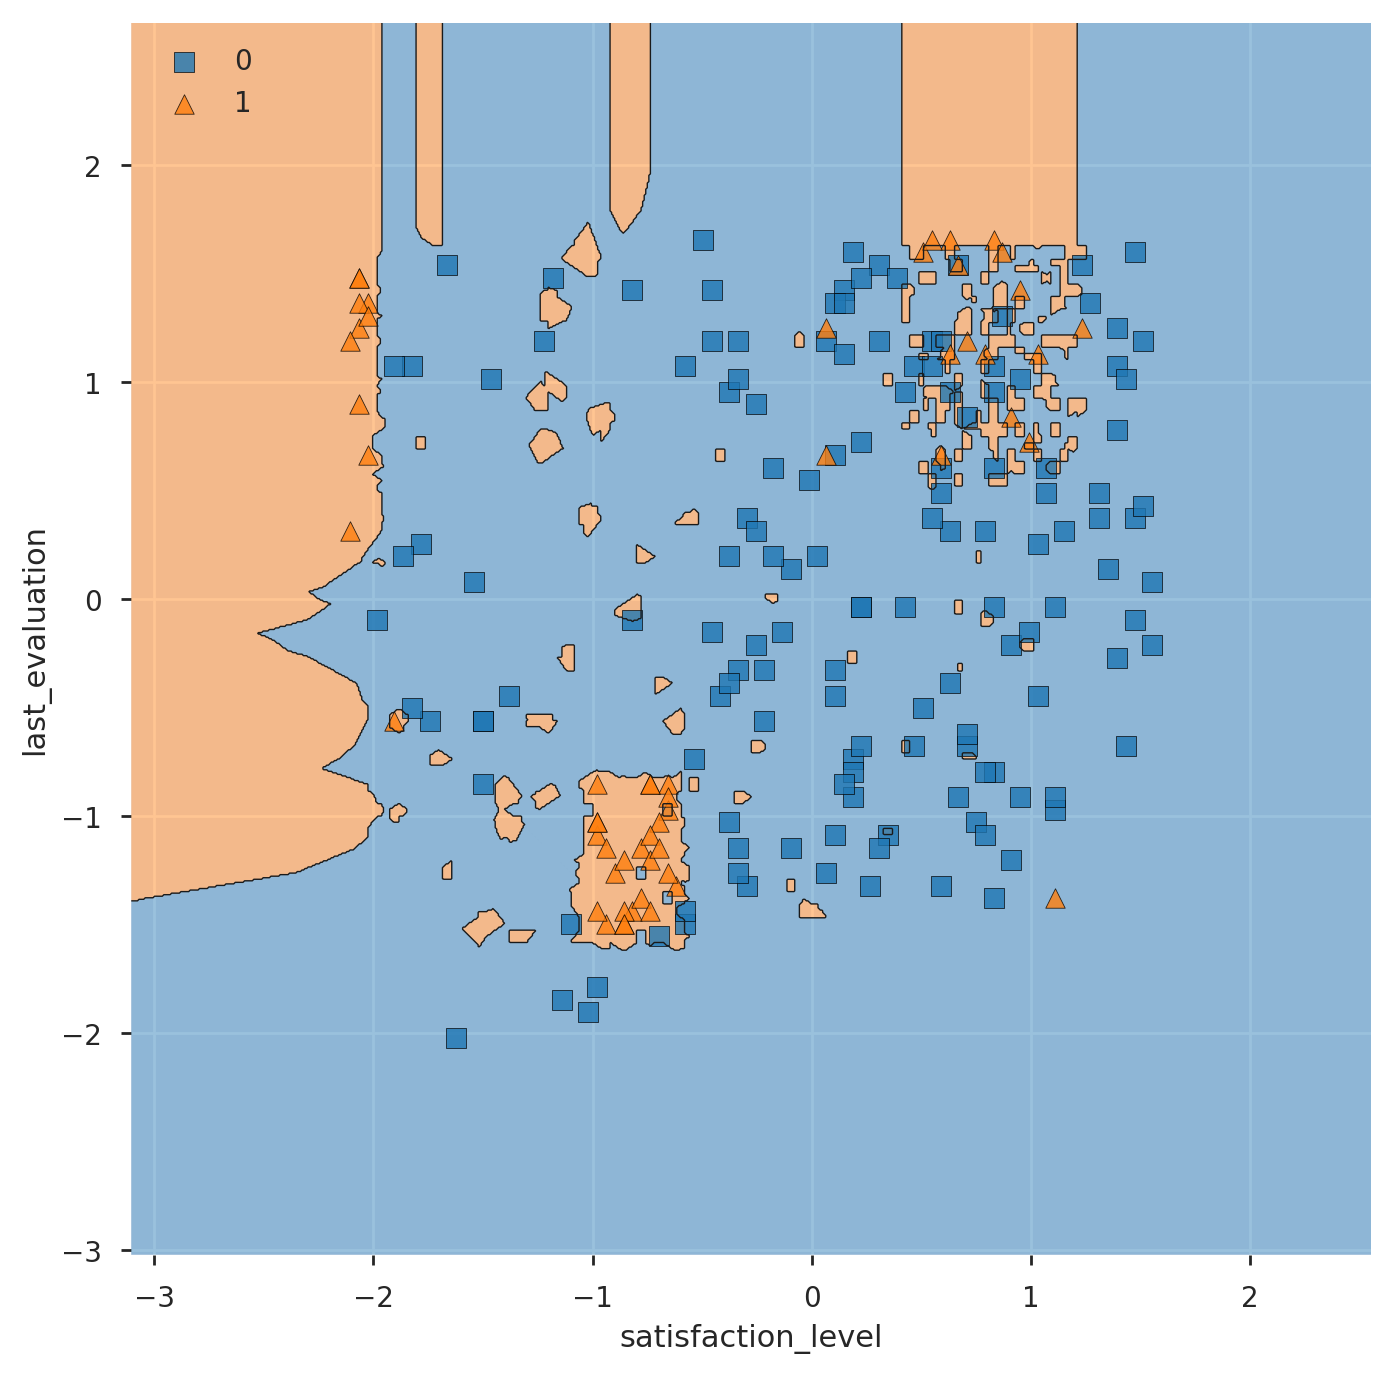

In [153]:
from sklearn.neighbors import KNeighborsClassifier

# Train a K-Nearest Neighbors model

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_std, y_train)

check_model_fit(knn, X_test_std, y_test)

total accuracy = 91.2%


predictions     
                   0    1
actual 0        1657   63
       1         134  396


percent accuracy score per class:
left = 0 : 96.34%
left = 1 : 74.72%



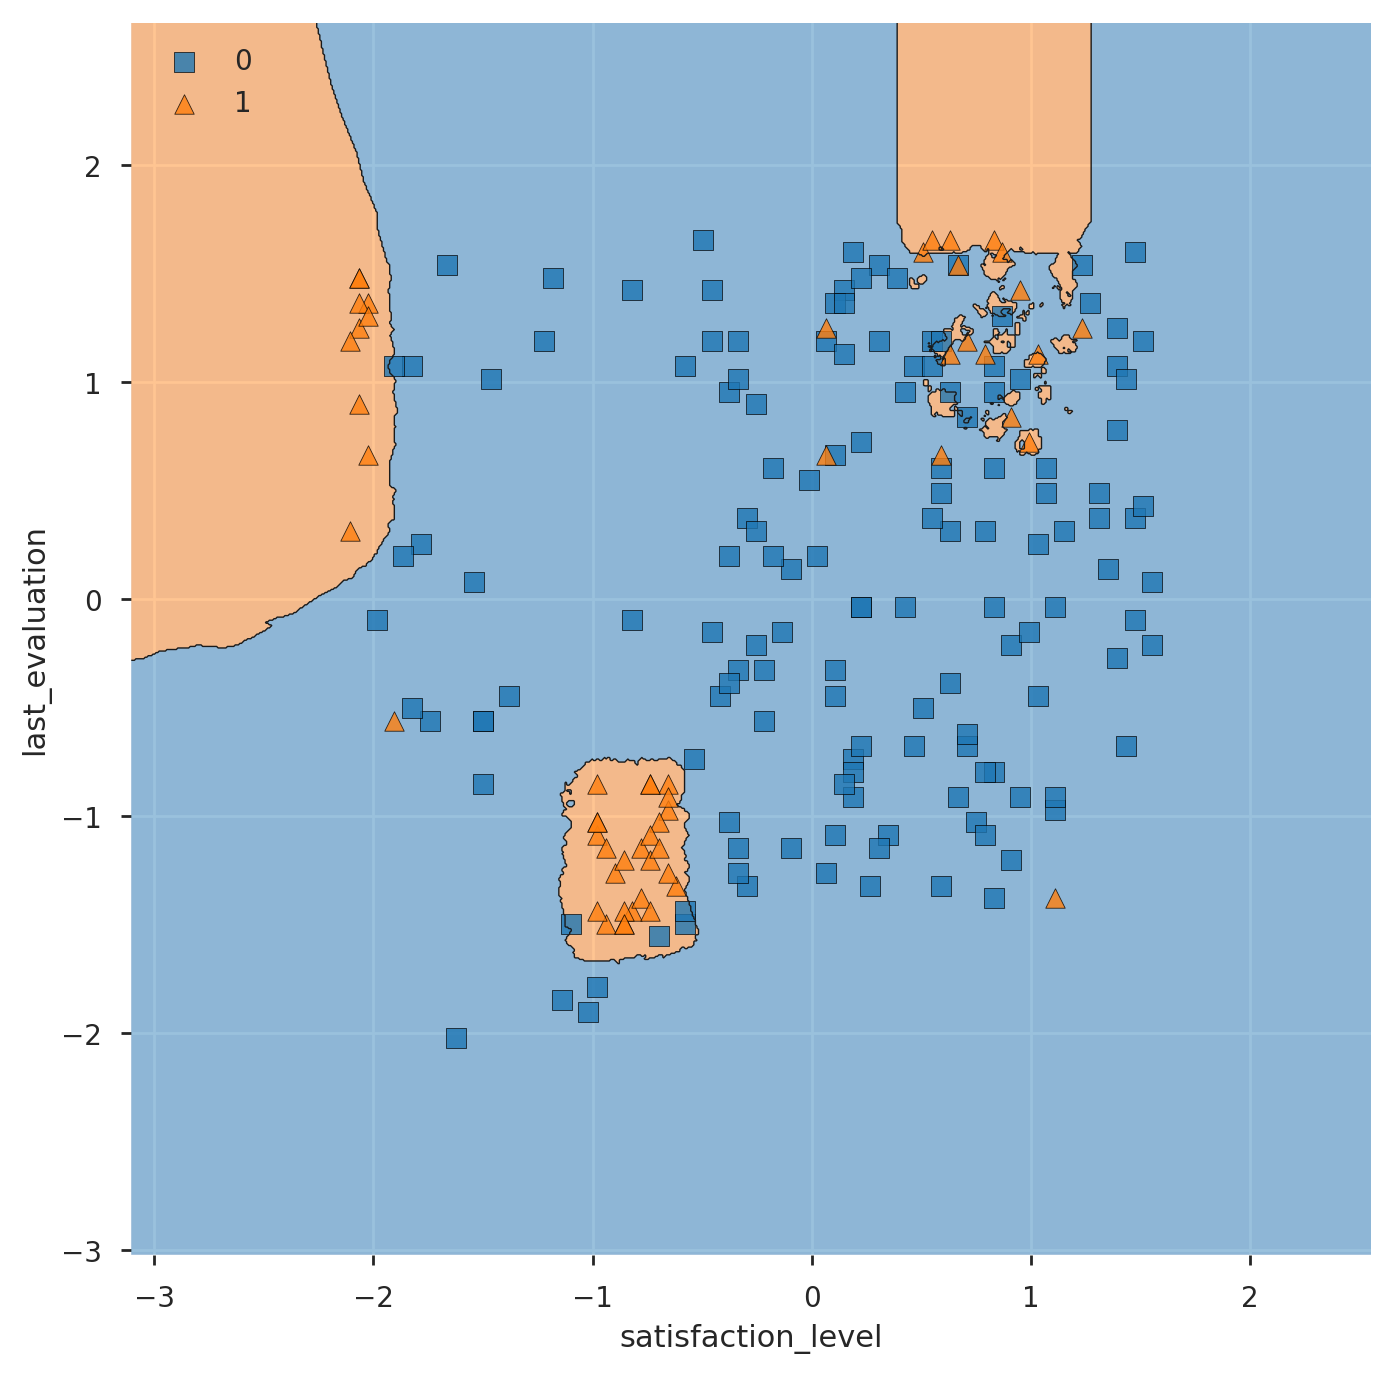

In [154]:
# Increase the number of "nearest neighbors" to reduce overfitting

knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train_std, y_train)

check_model_fit(knn, X_test_std, y_test)

### Training a Random Forest

total accuracy = 91.6%


predictions     
                   0    1
actual 0        1694   26
       1         163  367


percent accuracy score per class:
left = 0 : 98.49%
left = 1 : 69.25%



(0.2, 1.2)

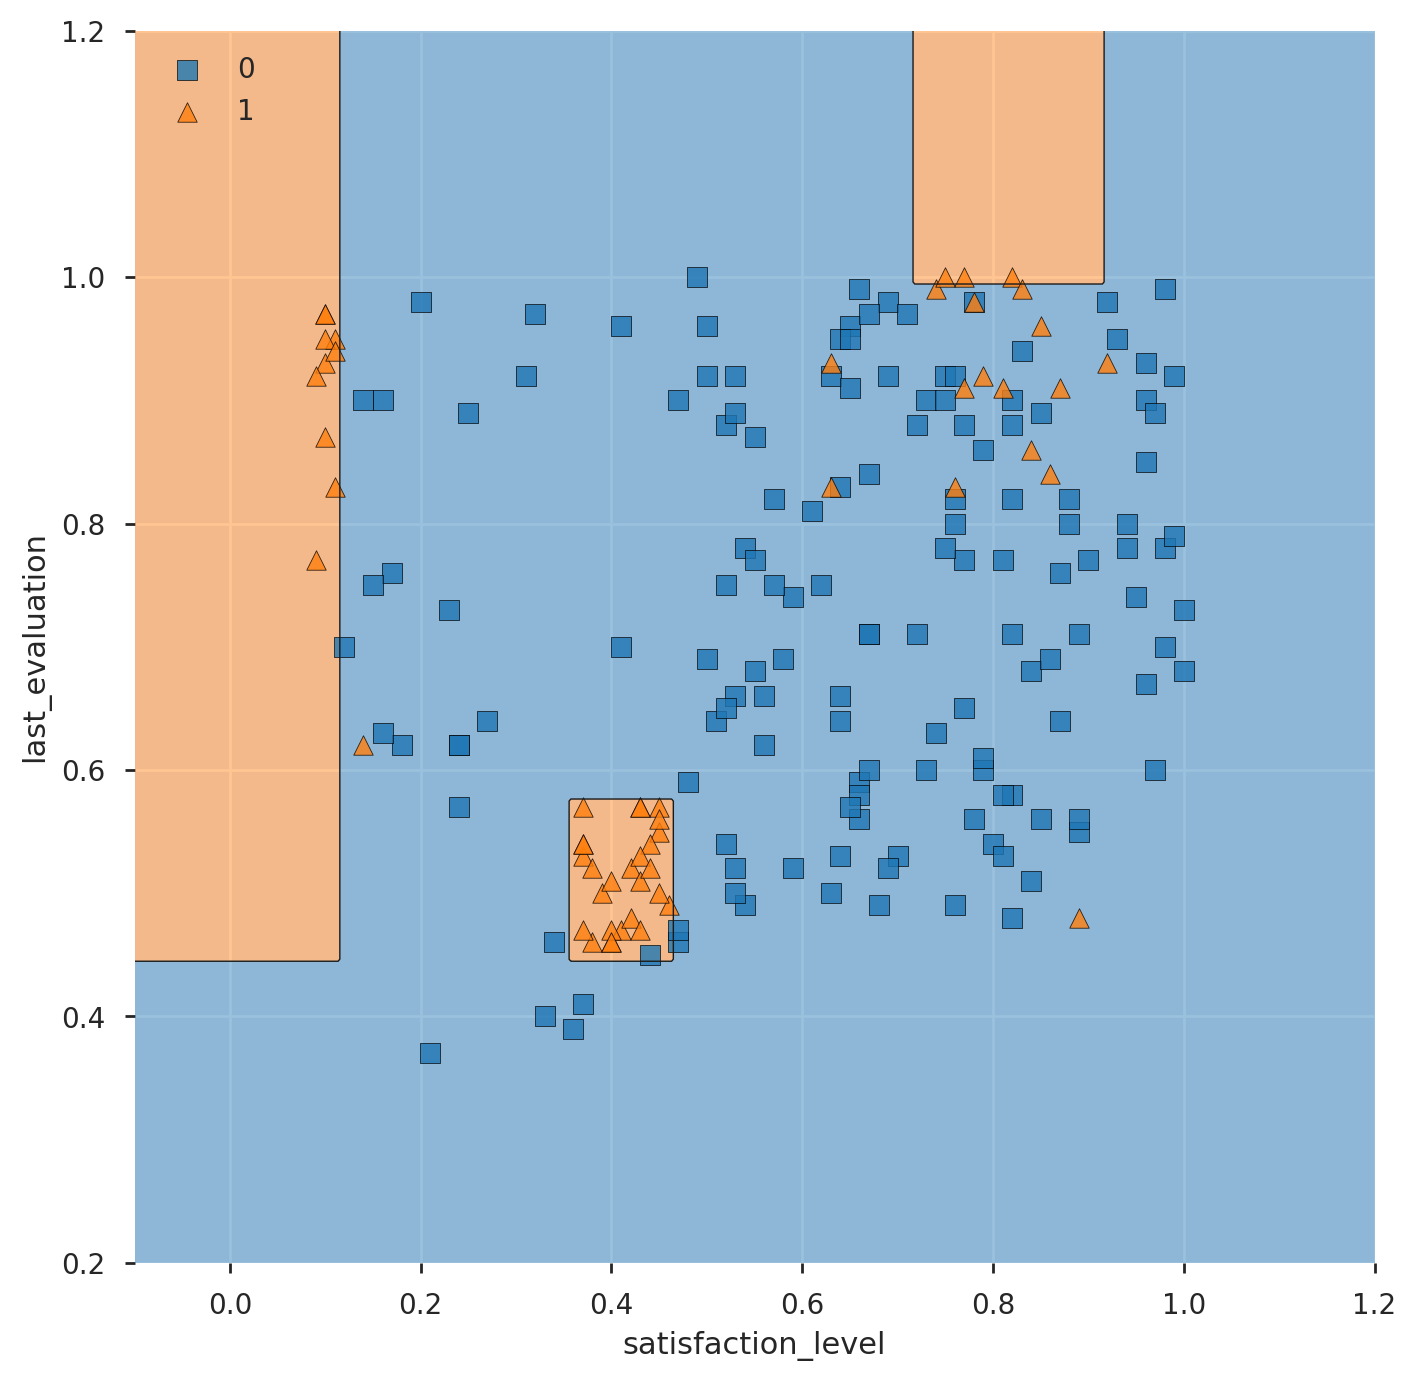

In [155]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=50, max_depth=5,
                                random_state=1)
forest.fit(X_train, y_train)

check_model_fit(forest, X_test, y_test)
plt.xlim(-0.1, 1.2)
plt.ylim(0.2, 1.2)

Note the distinctive axes-parallel decision boundaries produced by decision tree machine learning algorithms.

In [ ]:
# DO NOT RUN THIS CELL -- `graphviz` package just cannot be installed on OS X Mojave
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image, display
import graphviz

dot_data = export_graphviz(
                forest.estimators_[0],
                out_file=None, 
                feature_names=features,  
                class_names=['no', 'yes'],  
                filled=True, rounded=True,  
                special_characters=True)
graph = graphviz.Source(dot_data)
graph

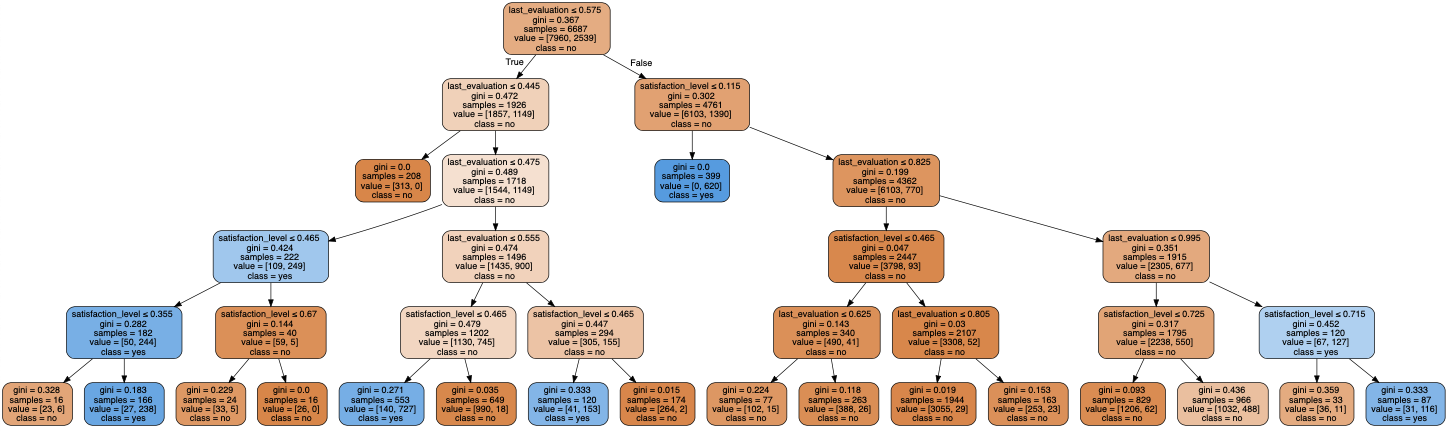

In [157]:
from IPython.display import Image
Image("Graphviz_hr_image051.png")

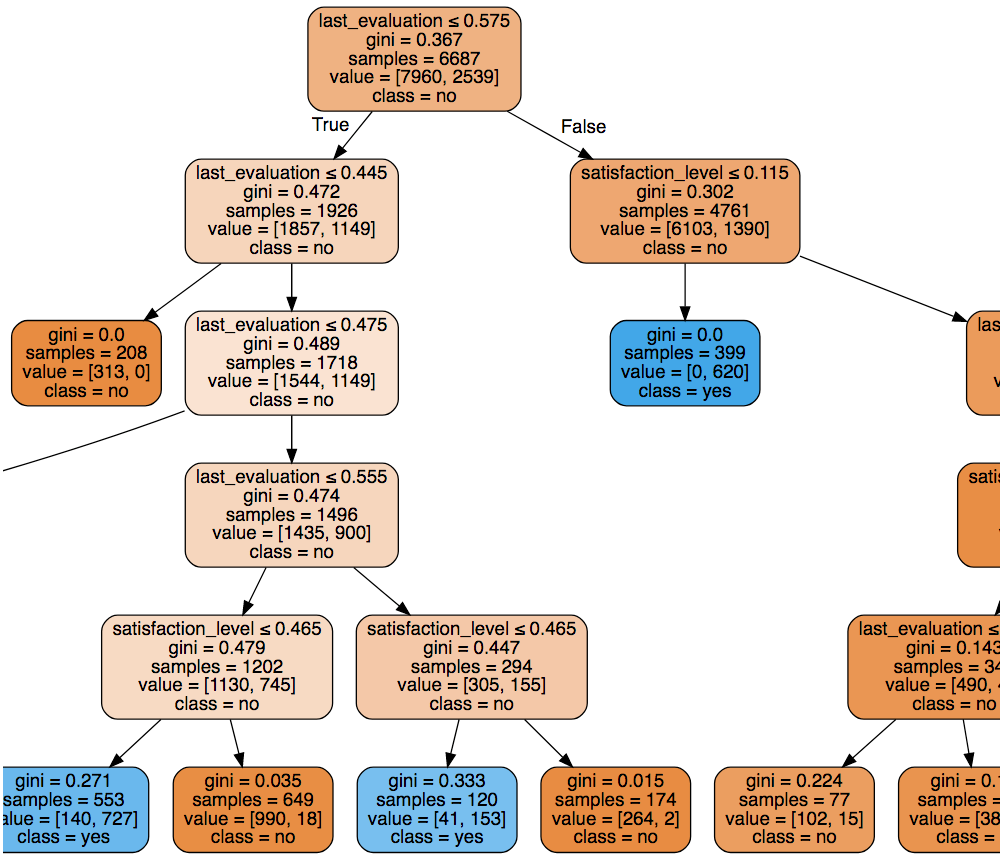

In [158]:
Image("Graphviz_hr_image050.png")

---

## Training and Testing the Classification Algorithms

Now that we have preprocessed the data and built our training and testing datasets, we can start to deploy different classification algorithms. It's relatively easy to test multiple models; as a result, we will compare and contrast the performance of ten different algorithms.

In [235]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14631 non-null float64
time_spend_company       14848 non-null float64
work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
is_smoker                235 non-null object
department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(4), int64(4), object(3)
memory usage: 1.3+ MB


In [159]:
# Create X and Y datasets for training
# Select training/validation set

features = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident',
       'promotion_last_5years', 'department_IT', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'salary_high',
       'salary_low', 'salary_medium']

X = hr[features].values
y = hr.left.values

In [160]:
# Simpler code to split the training test set
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [161]:
# Use the model_selection module to separate training and testing datasets
from sklearn import model_selection


# define seed for reproducibility
seed = 42

# split data into training and testing datasets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.15, random_state=seed)

<i>Cell below is entirely self-contained. Discuss live using saved output, because running it takes 8 minutes due to neural network! 

In [162]:
# Now that we have our dataset, we can start building algorithms! We'll need to import each algorithm we plan on using
# from sklearn.  We also need to import some performance metrics, such as accuracy_score and classification_report.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# define scoring method
scoring = 'accuracy'

# Define models to train
#names = ["Nearest Neighbors", "Gaussian Process",
#         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
#         "Naive Bayes", "SVM Linear", "SVM RBF", "SVM Sigmoid"]

names = ["Nearest Neighbors",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes"]

#classifiers = [
#    KNeighborsClassifier(n_neighbors = 8),
#    GaussianProcessClassifier(1.0 * RBF(1.0)),
#    DecisionTreeClassifier(max_depth=9),
#    RandomForestClassifier(max_depth=9, n_estimators=10, max_features=1),
#    MLPClassifier(alpha=10, solver='lbfgs', hidden_layer_sizes=[100], max_iter=2000, activation='logistic'),
#    AdaBoostClassifier(),
#    GaussianNB(),
#    SVC(kernel = 'linear', gamma='auto'), 
#    SVC(kernel = 'rbf', gamma='auto'),
#    SVC(kernel = 'sigmoid', gamma='auto')
#]

classifiers = [
    KNeighborsClassifier(n_neighbors = 8),
    DecisionTreeClassifier(max_depth=9),
    RandomForestClassifier(max_depth=9, n_estimators=10, max_features=1),
    MLPClassifier(alpha=10, solver='lbfgs', hidden_layer_sizes=[100], max_iter=2000, activation='logistic'),
    AdaBoostClassifier(),
    GaussianNB(),
]


models = list(zip(names, classifiers))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state = seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Nearest Neighbors: 0.938975 (0.005603)
Decision Tree: 0.978744 (0.004301)
Random Forest: 0.926741 (0.009425)
Neural Net: 0.926739 (0.007315)
AdaBoost: 0.958507 (0.004123)
Naive Bayes: 0.646089 (0.015234)


In [163]:
names

['Nearest Neighbors',
 'Decision Tree',
 'Random Forest',
 'Neural Net',
 'AdaBoost',
 'Naive Bayes']

In [164]:
# Remember, performance on the training data is not that important. We want to know how well our algorithms
# can generalize to new data.  To test this, let's make predictions on the validation dataset.

for name, model in list(models):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))
    
# Accuracy - ratio of correctly predicted observation to the total observations. 
# Precision - (false positives) ratio of correctly predicted positive observations to the total predicted positive observations
# Recall (Sensitivity) - (false negatives) ratio of correctly predicted positive observations to the all observations in actual class - yes.
# F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false 

Nearest Neighbors
0.9408888888888889
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1720
           1       0.86      0.89      0.88       530

   micro avg       0.94      0.94      0.94      2250
   macro avg       0.91      0.92      0.92      2250
weighted avg       0.94      0.94      0.94      2250

Decision Tree
0.9786666666666667
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1720
           1       0.98      0.93      0.95       530

   micro avg       0.98      0.98      0.98      2250
   macro avg       0.98      0.96      0.97      2250
weighted avg       0.98      0.98      0.98      2250

Random Forest
0.9248888888888889
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1720
           1       0.97      0.70      0.81       530

   micro avg       0.92      0.92      0.92      2250
   macro avg       0.94  

--- 
## Building a full model

### Commentary
This is classic p-value hacking! Picking models this way makes it very easy to increase accuracy on a training dataset by overfitting a model, which can result in poorer performance on unseen data.

Furthermore, using only one training/test split to compare models can introduce bias towards certain models and contribute to overfitting.

<b>K-fold cross validation</b> offers a solution to this problem and allows the variance to be accounted for by way of an error estimate on each accuracy calculation. This, in turn, naturally leads to the use of validation curves for tuning model parameters.

In [165]:
# Function to draw the validation curve

def plot_validation_curve(train_scores, test_scores,
                          param_range, xlabel='', log=False):
    '''
    This code is from scikit-learn docs:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
    
    Also here:
    https://github.com/rasbt/python-machine-learning-book-2nd-edition/blob/master/code/ch06/ch06.ipynb
    '''
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    fig = plt.figure()
    
    plt.plot(param_range, train_mean, 
             color=sns.color_palette('Set1')[1], marker='o', 
             markersize=5, label='training accuracy')

    plt.fill_between(param_range, train_mean + train_std,
                     train_mean - train_std, alpha=0.15,
                     color=sns.color_palette('Set1')[1])

    plt.plot(param_range, test_mean, 
             color=sns.color_palette('Set1')[0], linestyle='--', 
             marker='s', markersize=5, 
             label='validation accuracy')

    plt.fill_between(param_range, 
                     test_mean + test_std,
                     test_mean - test_std, 
                     alpha=0.15, color=sns.color_palette('Set1')[0])

    if log:
        plt.xscale('log')
    plt.legend(loc='lower right')
    if xlabel:
        plt.xlabel(xlabel)
    plt.ylabel('Accuracy')
    plt.ylim(0.9, 1.0)
    return fig

In [166]:
# Custom function for class accuracies

from sklearn.model_selection import StratifiedKFold

def cross_val_class_score(clf, X, y, cv=10):
    kfold = StratifiedKFold(n_splits=cv)\
                .split(X, y)

    class_accuracy = []
    for k, (train, test) in enumerate(kfold):
        clf.fit(X[train], y[train])
        y_test = y[test]
        y_pred = clf.predict(X[test])
        cmat = confusion_matrix(y_test, y_pred)
        class_acc = cmat.diagonal()/cmat.sum(axis=1)
        class_accuracy.append(class_acc)
        print('fold: {:d} accuracy: {:s}'.format(k+1, str(class_acc)))
        
    return np.array(class_accuracy)

In [167]:
# Select training/validation set

features = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident',
       'promotion_last_5years', 'department_IT', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'salary_high',
       'salary_low', 'salary_medium']

X = hr[features].values
y = hr.left.values

Random Forests are an attractive algorithm. For one thing, they're compatible with feature sets composed of both continuous and categorical data.

A Random Forest builds multiple decision trees and merges them together to get a more accurate and stable prediction. Very simplistically, random forests are a collection of decision tress (but with notable algorithmic  differences).  

In [168]:
%%time
# Calculate a validation curve for max_depth
# using a Random Forest classifier

np.random.seed(42)
from sklearn.model_selection import validation_curve

clf = RandomForestClassifier(n_estimators=20)
max_depths = [3, 4, 5, 6, 7,
              9, 12, 15, 18, 21]
print('Training {} models ...'.format(len(max_depths)))
train_scores, test_scores = validation_curve(
            estimator=clf,
            X=X,
            y=y,
            param_name='max_depth',
            param_range=max_depths,
            cv=5);

Training 10 models ...
CPU times: user 6.68 s, sys: 46.2 ms, total: 6.73 s
Wall time: 7.19 s


<b>Validation curves</b> are plots of a training and validation metric as a function of some model parameter. They plot the accuracy as a function of a hyperparameter, such as the number of decision trees used in a Random Forest or the max depth.

(3, 21)

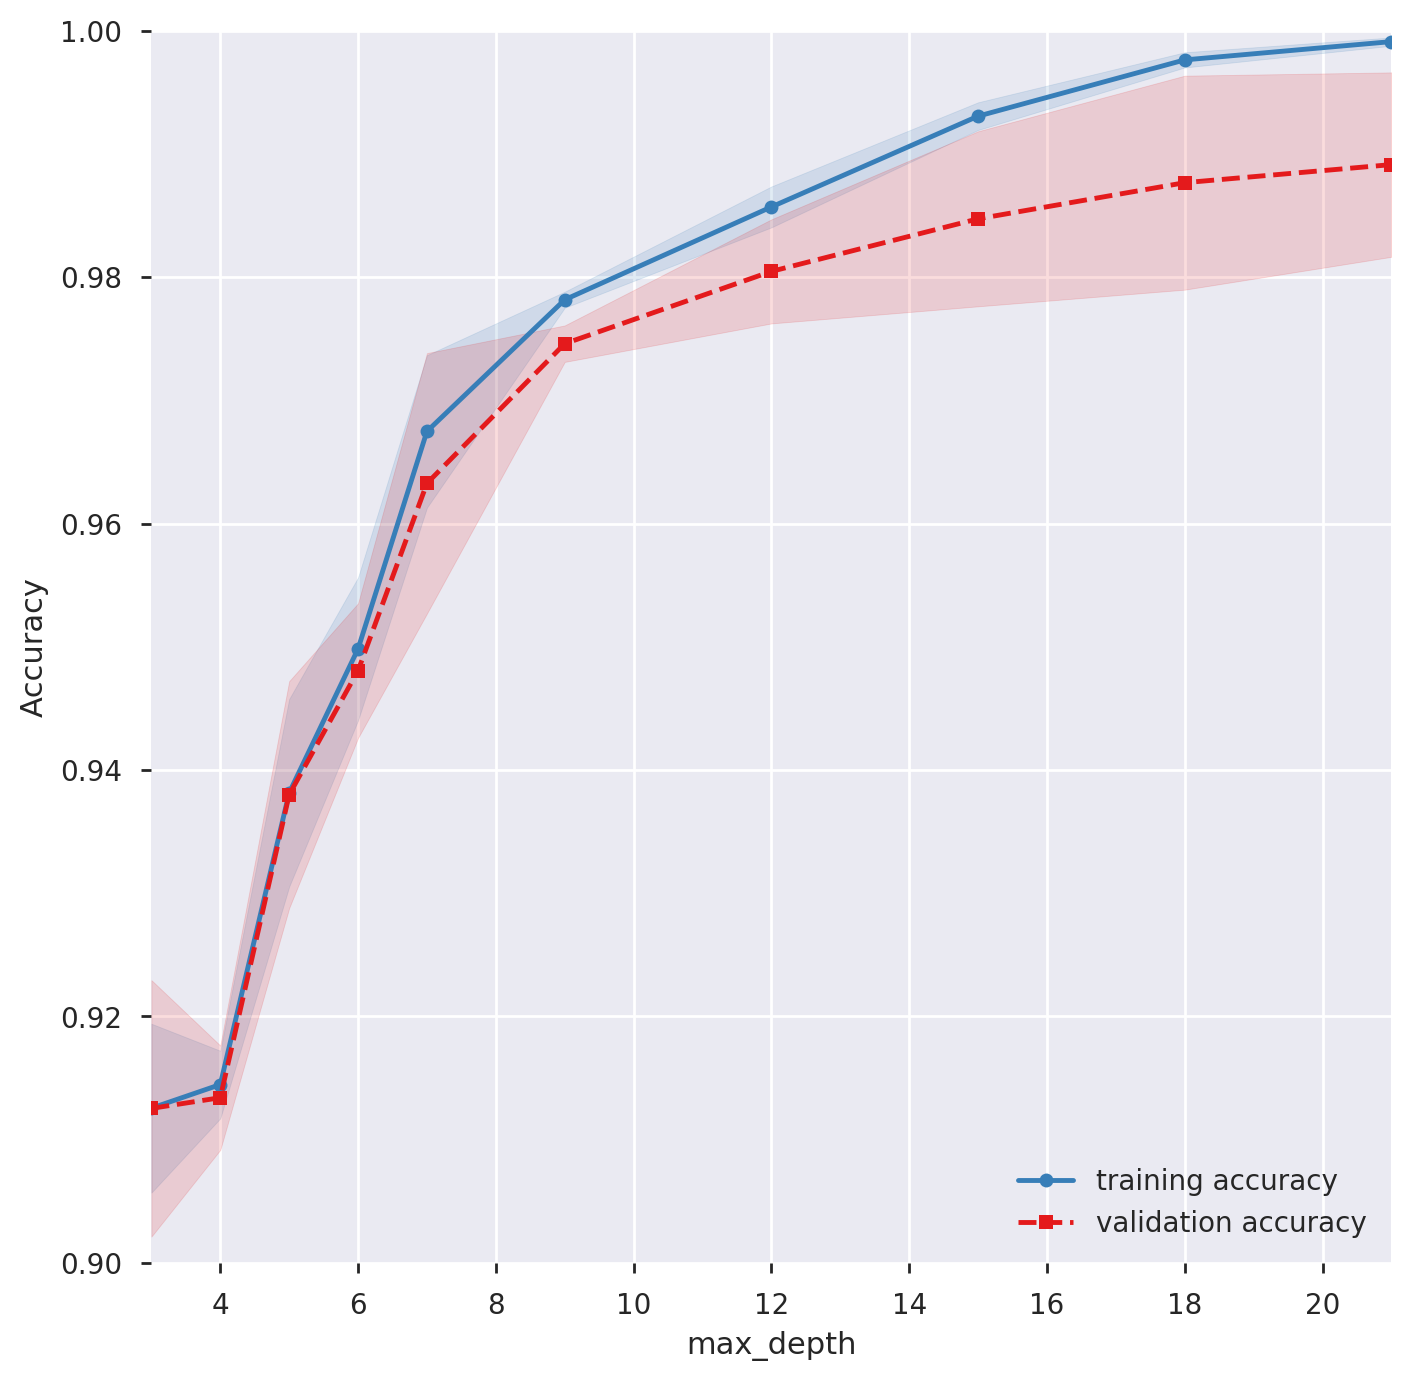

In [169]:
# Draw the validation curve

plot_validation_curve(train_scores, test_scores,
                      max_depths, xlabel='max_depth')
plt.xlim(3, 21)

#### Interpreting the validation curve
Starting on the left side of the plot, we see that both training & validation results <i>generally</i> align on the accuracy score, which is good. 

Taking max-depth to 6 or push up to 9, we can see a point/region where the error bars of these two accuracy lines no longer overlap. The optimal value for the max_depth parameter (<i>i.e.</i>, hyperparameter) can be found by looking for a high validation score with overlapping error bars on the two lines.

In [170]:
# Stratified k-fold cross validation
from sklearn.model_selection import cross_val_score

# Show k-fold results for the selected model:
# a random forest with max_depth = 6 or 9 and n_estimators = 200

np.random.seed(42)
clf = RandomForestClassifier(n_estimators=200, max_depth=6)
scores = cross_val_class_score(clf, X, y)

print('accuracy = {} +/- {}'.format(scores.mean(axis=0), scores.std(axis=0)))

fold: 1 accuracy: [0.99825022 0.87988827]
fold: 2 accuracy: [0.99825022 0.81792717]
fold: 3 accuracy: [0.99300087 0.83753501]
fold: 4 accuracy: [0.99300087 0.85154062]
fold: 5 accuracy: [0.99562555 0.80672269]
fold: 6 accuracy: [0.99300087 0.88235294]
fold: 7 accuracy: [0.99650044 0.88235294]
fold: 8 accuracy: [0.99650044 0.85994398]
fold: 9 accuracy: [0.99562172 0.8767507 ]
fold: 10 accuracy: [0.99737303 0.87114846]
accuracy = [0.99571242 0.85661628] +/- [0.00197367 0.02621081]


Text(0, 0.5, 'Accuracy')

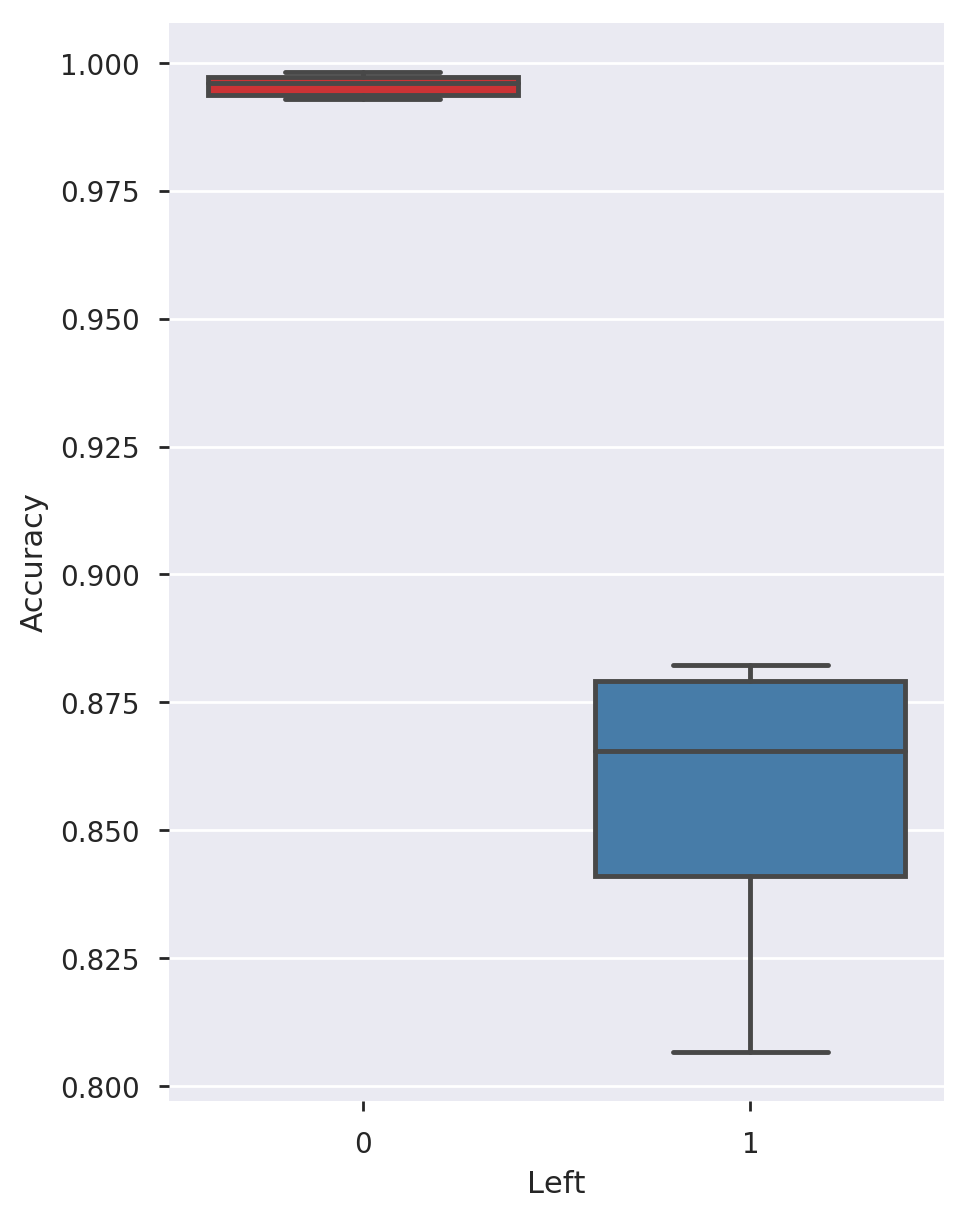

In [171]:
# Box plot of result

fig = plt.figure(figsize=(5, 7))
sns.boxplot(data=pd.DataFrame(scores, columns=[0, 1]),
            palette=sns.color_palette('Set1'))
plt.xlabel('Left')
plt.ylabel('Accuracy')

In [172]:
# Access feature importances

d = (clf.feature_importances_, hr.columns)
list(zip(*d))

[(0.3221341540322481, 'satisfaction_level'),
 (0.10514009388224711, 'last_evaluation'),
 (0.21754372831979535, 'number_project'),
 (0.1448651944265881, 'average_montly_hours'),
 (0.1803773367926685, 'time_spend_company'),
 (0.01245773082658312, 'work_accident'),
 (0.0006812160929433458, 'left'),
 (0.00019813231404224602, 'promotion_last_5years'),
 (0.0007641818694089226, 'department_IT'),
 (0.0002158530768904915, 'department_RandD'),
 (0.00038486110100228505, 'department_accounting'),
 (0.0002492041687879511, 'department_hr'),
 (0.00010152340662221724, 'department_management'),
 (0.0001913497684982789, 'department_marketing'),
 (0.000379937351828489, 'department_product_mng'),
 (0.0003797612675760913, 'department_sales'),
 (0.0004360601832883374, 'department_support'),
 (0.00515993180748012, 'department_technical'),
 (0.005958820580538814, 'salary_high'),
 (0.002380928730962107, 'salary_low')]

## Dimensionality Reduction techniques

Dimensionality reduction can simply involve removing unimportant features from the training data, but more exotic methods exist, such as Principal Component Analysis (PCA). 

This technique transforms the data by projecting it into a new subspace of orthogonal "principal components," where the components with the highest eigenvalues encode the most information for training the model. Then, we can simply select a few of these principal components in place of the original high-dimensional dataset.

Our purpose here is to use PCA to improve our Random Forest.

Text(0.5, 0, 'Feature importance')

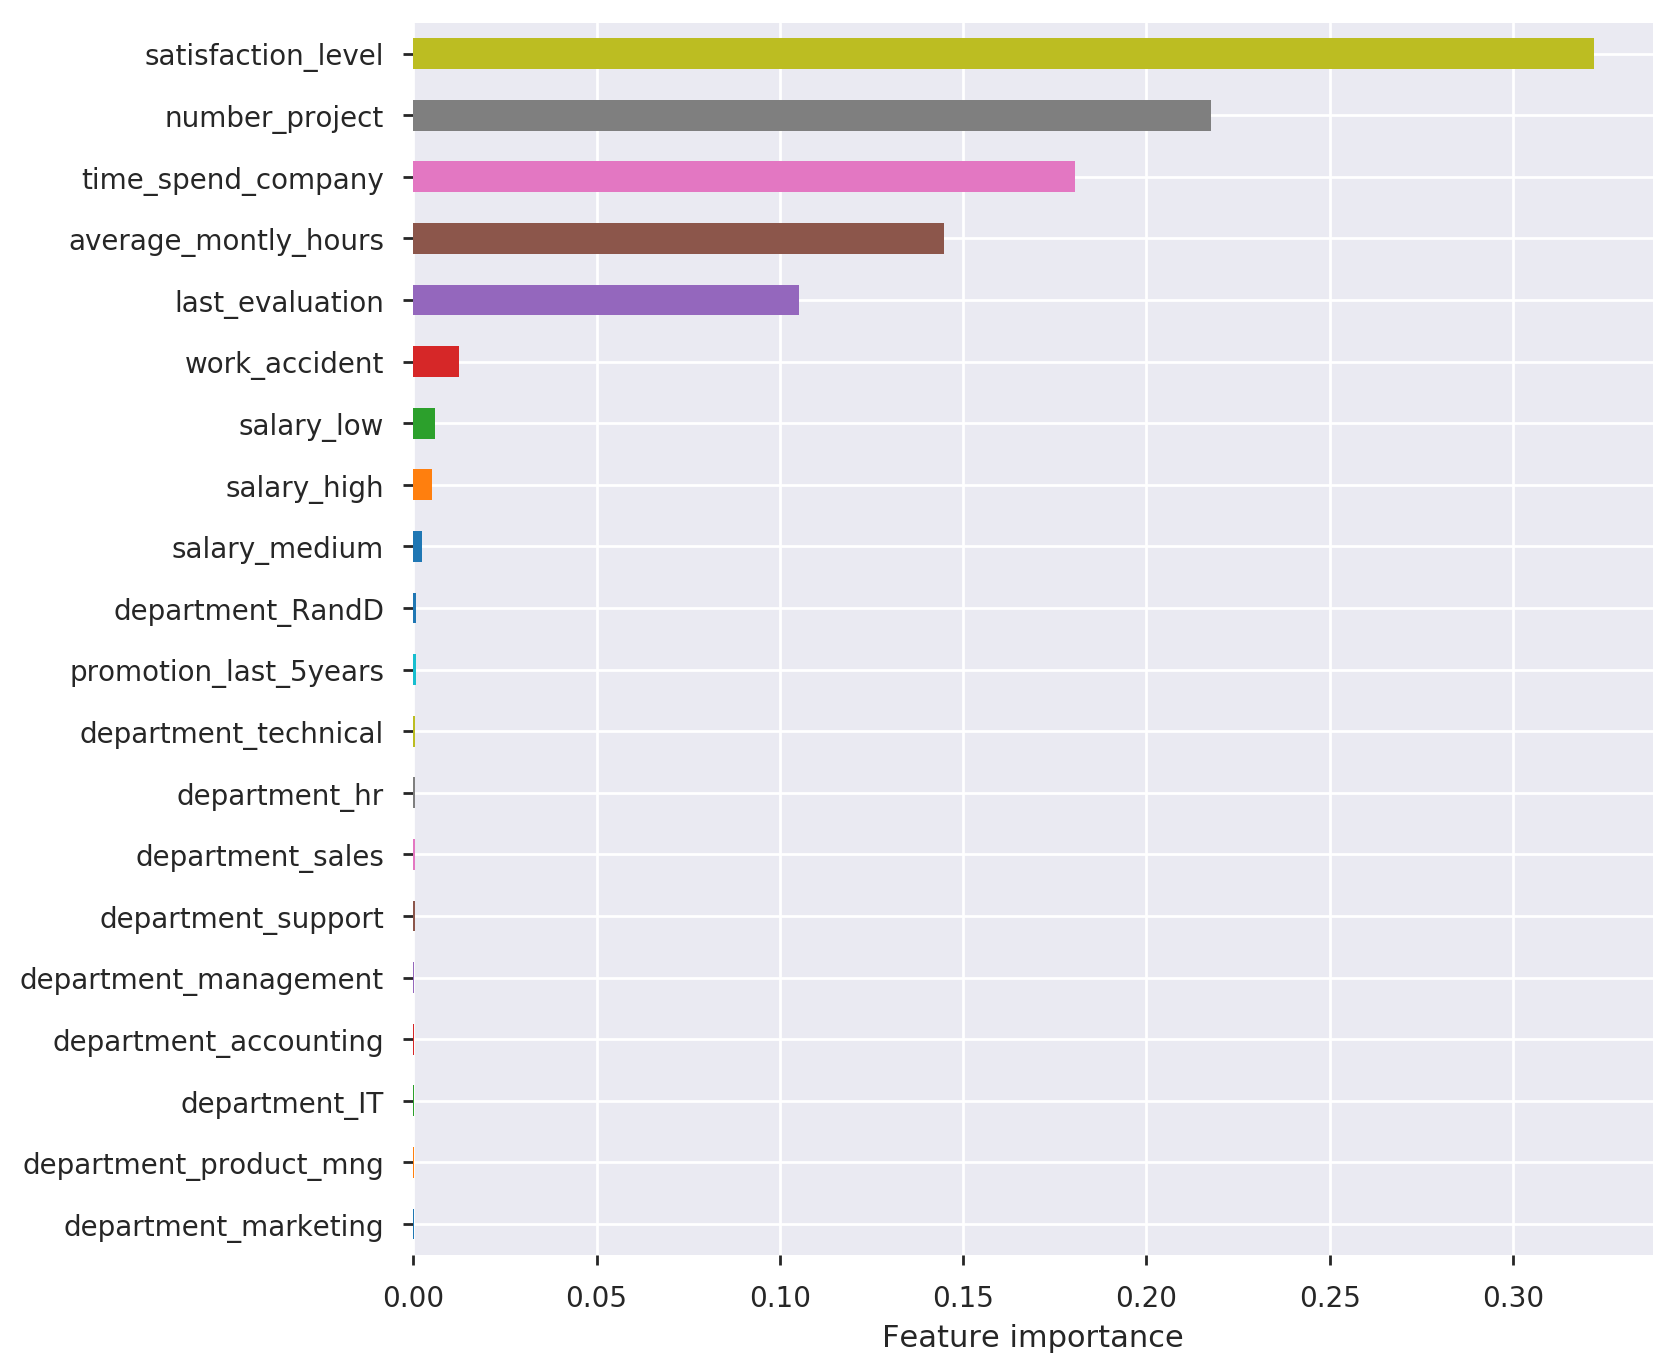

In [173]:
# Visualize the feature importances

pd.Series(clf.feature_importances_, name='Feature importance',
            index=hr[features].columns)\
    .sort_values()\
    .plot.barh()
plt.xlabel('Feature importance')

In [174]:
# Print all the features with low importance

importances = list(pd.Series(clf.feature_importances_, index=hr[features].columns)\
        .sort_values(ascending=False).index)

np.array(importances[5:])

array(['work_accident', 'salary_low', 'salary_high', 'salary_medium',
       'department_RandD', 'promotion_last_5years',
       'department_technical', 'department_hr', 'department_sales',
       'department_support', 'department_management',
       'department_accounting', 'department_IT', 'department_product_mng',
       'department_marketing'], dtype='<U22')

In [175]:
# Reduce the one-hot-encoded features with PCA

from sklearn.decomposition import PCA

pca_features = ['work_accident', 'salary_low', 'salary_high', 'salary_medium',
       'promotion_last_5years', 'department_RandD', 'department_hr',
       'department_technical', 'department_support',
       'department_management', 'department_sales',
       'department_accounting', 'department_IT', 'department_product_mng',
       'department_marketing']

X_reduce = hr[pca_features]

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_reduce)

In [176]:
X_pca

array([[-0.67733089,  0.75837169, -0.10493685],
       [ 0.73616575,  0.77155888, -0.11046422],
       [ 0.73616575,  0.77155888, -0.11046422],
       ...,
       [-0.67157059, -0.3337546 ,  0.70975452],
       [-0.67157059, -0.3337546 ,  0.70975452],
       [-0.67157059, -0.3337546 ,  0.70975452]])

In [177]:
# Add principal components to our `hr` dataframe

hr['first_principle_component'] = X_pca.T[0]
hr['second_principle_component'] = X_pca.T[1]
hr['third_principle_component'] = X_pca.T[2]

In [178]:
# Select reduced-dimension feature set

features = ['satisfaction_level', 'number_project', 'time_spend_company',
            'average_montly_hours', 'last_evaluation',
            'first_principle_component',
            'second_principle_component',
            'third_principle_component']

X = hr[features].values
y = hr.left.values

In [179]:
# Show k-fold results for the selected model with reduced dimensionality:
# a random forest with max_depth = 6 or 9, and n_estimators = 200

np.random.seed(42)
clf = RandomForestClassifier(n_estimators=200, max_depth=6)
scores = cross_val_class_score(clf, X, y)

print('accuracy = {} +/- {}'.format(scores.mean(axis=0), scores.std(axis=0)))

fold: 1 accuracy: [0.99825022 0.91620112]
fold: 2 accuracy: [0.99825022 0.88795518]
fold: 3 accuracy: [0.99737533 0.90196078]
fold: 4 accuracy: [0.99300087 0.91036415]
fold: 5 accuracy: [0.99387577 0.88795518]
fold: 6 accuracy: [0.99562555 0.90756303]
fold: 7 accuracy: [0.99737533 0.92436975]
fold: 8 accuracy: [0.99475066 0.89635854]
fold: 9 accuracy: [0.99474606 0.91596639]
fold: 10 accuracy: [0.99474606 0.91316527]
accuracy = [0.99579961 0.90618594] +/- [0.00178498 0.01172104]


Text(0, 0.5, 'Accuracy')

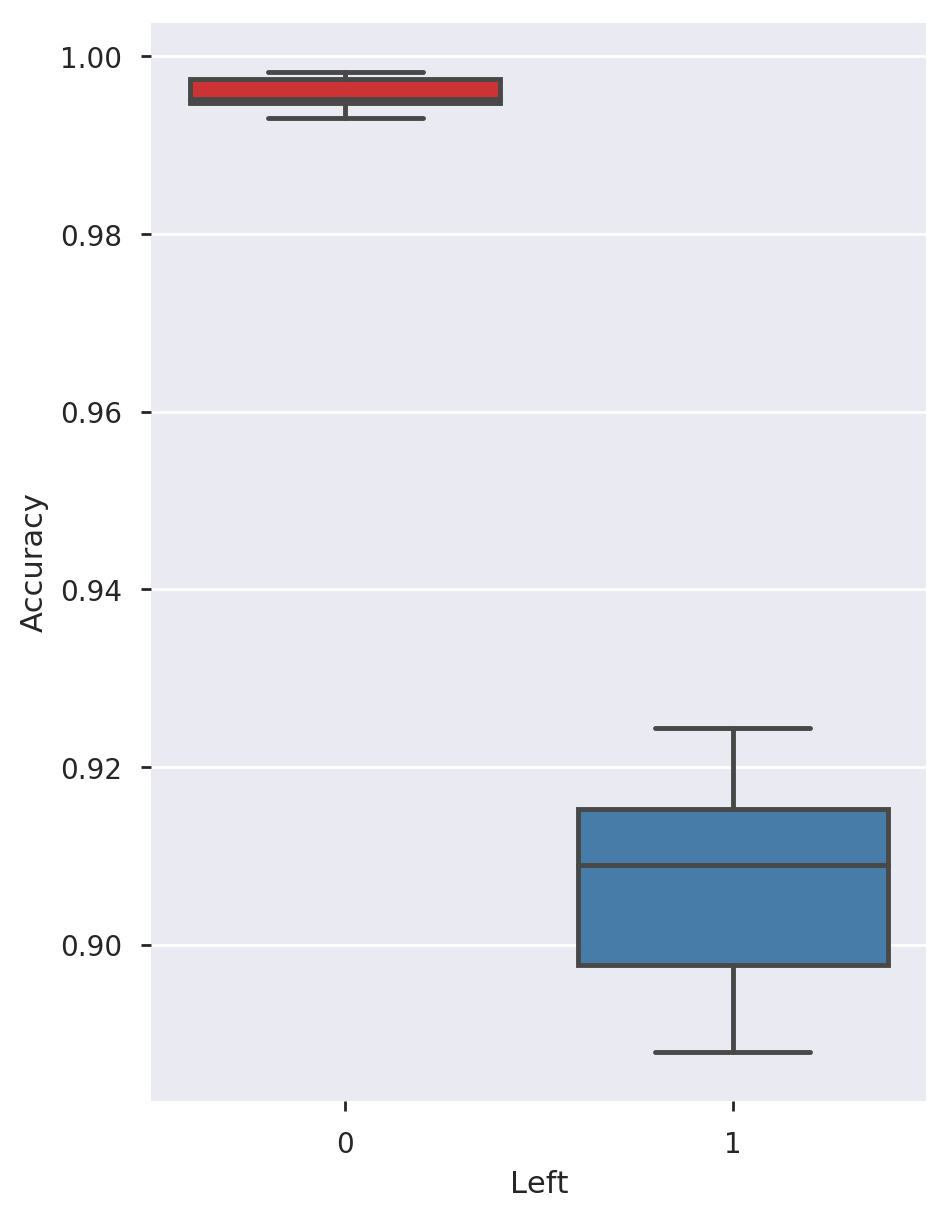

In [180]:
# Box plot of result

fig = plt.figure(figsize=(5, 7))
sns.boxplot(data=pd.DataFrame(scores, columns=[0, 1]),
            palette=sns.color_palette('Set1'))
plt.xlabel('Left')
plt.ylabel('Accuracy')

Comparing this to the previous boxplot before dimensionality reduction, we find an improvement in the class 1 accuracy! Now, the majority of the validation sets return an accuracy greater than 90%. The average accuracy of 90.6% can be compared to the accuracy of 85.6% prior to dimensionality reduction!

---

## Operationalizing this model

Train the final model on all the samples

In [181]:
operational_model = RandomForestClassifier(n_estimators=200, max_depth=6)
operational_model.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Save this model offline

In [182]:
from sklearn.externals import joblib
joblib.dump(operational_model, 'random-forest-trained.pkl')

['random-forest-trained.pkl']

Confirm that this *.pkl file has been saved in the working directory

In [236]:
!ls *.pkl

random-forest-trained.pkl


Re-load the model from the *pkl file

In [237]:
working_model = joblib.load('random-forest-trained.pkl')
working_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### Creating a whole new person with unseen feature values.  

In [238]:
StephenMiller = pd.Series([0.8,0.85,9,288,6,0,'yes',0,'yes','sales','low', 0.341423, -0.831704, -.787979],
                          ['satisfaction_level','last_evaluation','number_project','average_montly_hours',
                           'time_spend_company','work_accident','left','promotion_last_5years',
                           'is_smoker','department','salary', 'first_principle_component', 
                           'second_principle_component', 'third_principle_component'])

In [241]:
type(StephenMiller)

pandas.core.series.Series

In [186]:
StephenMiller[features]

satisfaction_level                 0.8
number_project                       9
time_spend_company                   6
average_montly_hours               288
last_evaluation                   0.85
first_principle_component     0.341423
second_principle_component   -0.831704
third_principle_component    -0.787979
dtype: object

In [187]:
featuresStephenMiller = StephenMiller[features]

In [188]:
working_model.predict_proba([featuresStephenMiller])

array([[0.31366426, 0.68633574]])

The left 0,1 corresponding value has Stephen leaving with a probability of ~69%. <i>Recall that these [features] are the dimensionality reduced.</i> 

#### What if we let Stephen work fewer hours, take on fewer projects, and give him a better performance score?

In [242]:
featuresStephenMiller.average_montly_hours = 180
featuresStephenMiller.number_project = 2
featuresStephenMiller.last_evaluation = 0.99
working_model.predict_proba([featuresStephenMiller])

array([[0.77690818, 0.22309182]])

Stephen's attrition probability goes down significantly to 22%, down from 69%! 

---
## Advanced ML using H2O

In [191]:
import h2o
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator

h2o.init(min_mem_size = "15g")

# from h2o.estimators.deepwater import H2ODeepWaterEstimator 
## Cannot build a Deep Water model - no backend found.
#if not H2ODeepWaterEstimator.available(): exit

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,22 mins 56 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.0.3
H2O cluster version age:,17 days
H2O cluster name:,H2O_from_python_mashrukzahid_a68147
H2O cluster total nodes:,1
H2O cluster free memory:,13.90 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"


In [192]:
# hr_hx = h2o.H2OFrame(hr)
hr_data = "hr_data.csv"
hr_hx = h2o.import_file(path = hr_data)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [193]:
hr_hx.describe()

Rows:14999
Cols:11




,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,is_smoker,department,salary
type,real,real,int,int,int,int,enum,int,enum,enum,enum
mins,0.09,0.36,2.0,96.0,2.0,0.0,,0.0,,,
mean,0.6128335222348159,0.7161017401160078,3.80305353690246,200.95837605085094,3.494140625,0.1446096406427095,,0.021268084538969265,,,
maxs,1.0,1.0,7.0,310.0,10.0,1.0,,1.0,,,
sigma,0.2486306510611426,0.17116911062327533,1.2325923553183522,50.00230729537288,1.458976073493048,0.35171855238017985,,0.14428146457858235,,,
zeros,0,0,0,0,0,12830,,14680,,,
missing,0,0,0,368,151,0,0,0,14764,0,0
0,0.38,0.53,2.0,157.0,3.0,0.0,yes,0.0,,sales,low
1,0.8,0.86,5.0,262.0,6.0,0.0,yes,0.0,yes,sales,medium
2,0.11,0.88,7.0,272.0,4.0,0.0,yes,0.0,,sales,medium


In [194]:
for i in ['left', 'is_smoker', 'department', 'salary']:
    hr_hx[i] = hr_hx[i].asfactor()

In [195]:
# no need to convert select features to Categorical in H2O because it imports correctly
hr_hx.types

{'satisfaction_level': 'real',
 'last_evaluation': 'real',
 'number_project': 'int',
 'average_montly_hours': 'int',
 'time_spend_company': 'int',
 'work_accident': 'int',
 'left': 'enum',
 'promotion_last_5years': 'int',
 'is_smoker': 'enum',
 'department': 'enum',
 'salary': 'enum'}

In [196]:
hr_hx.summary()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,is_smoker,department,salary
type,real,real,int,int,int,int,enum,int,enum,enum,enum
mins,0.09,0.36,2.0,96.0,2.0,0.0,,0.0,,,
mean,0.6128335222348159,0.7161017401160078,3.80305353690246,200.95837605085094,3.494140625,0.1446096406427095,,0.021268084538969265,,,
maxs,1.0,1.0,7.0,310.0,10.0,1.0,,1.0,,,
sigma,0.2486306510611426,0.17116911062327533,1.2325923553183522,50.00230729537288,1.458976073493048,0.35171855238017985,,0.14428146457858235,,,
zeros,0,0,0,0,0,12830,,14680,,,
missing,0,0,0,368,151,0,0,0,14764,0,0
0,0.38,0.53,2.0,157.0,3.0,0.0,yes,0.0,,sales,low
1,0.8,0.86,5.0,262.0,6.0,0.0,yes,0.0,yes,sales,medium
2,0.11,0.88,7.0,272.0,4.0,0.0,yes,0.0,,sales,medium


In [197]:
predictors = list(set(hr_hx.names))
predictors.remove('is_smoker')

predictors.remove('left')
response = "left"

predictors

['salary',
 'number_project',
 'promotion_last_5years',
 'department',
 'time_spend_company',
 'satisfaction_level',
 'work_accident',
 'average_montly_hours',
 'last_evaluation']

In [198]:
r = hr_hx.runif(seed = 42)
train = hr_hx[r  < 0.8]                 ## 80% for training
valid = hr_hx[(r >= 0.8) & (r < 0.9)]   ## 10% for early stopping (only enabled by default for Deep Water)
test  = hr_hx[r  >= 0.9]                ## 10% for final testing
print(train.dim)
print(valid.dim)
print(test.dim)

[12041, 11]
[1457, 11]
[1501, 11]


In [199]:
from h2o.automl import H2OAutoML

In [200]:
aml = H2OAutoML(max_models = 18, seed = 42, max_runtime_secs = 400)
aml.train(x = predictors, y = response, training_frame = train, validation_frame = valid)

aml.leaderboard

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,mean_per_class_error,rmse,mse
GBM_2_AutoML_20190108_225406,0.993248,0.0548414,0.0221772,0.10932,0.0119508
GBM_1_AutoML_20190108_225406,0.993235,0.0553646,0.0243691,0.110551,0.0122216
GBM_3_AutoML_20190108_225406,0.993126,0.0545663,0.0220901,0.10718,0.0114876
GBM_grid_1_AutoML_20190108_225406_model_2,0.992794,0.05317,0.0215342,0.105171,0.011061
GBM_4_AutoML_20190108_225406,0.992615,0.0548869,0.0205855,0.105251,0.0110779
XGBoost_1_AutoML_20190108_225406,0.992587,0.0664494,0.0300161,0.126522,0.0160079
StackedEnsemble_AllModels_AutoML_20190108_225406,0.992335,0.0532018,0.0208909,0.103845,0.0107838
StackedEnsemble_BestOfFamily_AutoML_20190108_225406,0.992163,0.0535346,0.0207819,0.10388,0.0107911
GBM_5_AutoML_20190108_225406,0.991784,0.0671191,0.0298417,0.125718,0.015805
XGBoost_grid_1_AutoML_20190108_225406_model_2,0.991444,0.0590863,0.0211853,0.108893,0.0118576


In [201]:
aml.leader

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_2_AutoML_20190108_225406


ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.0026206054605068356
RMSE: 0.05119184955153345
LogLoss: 0.015299815261122866
Mean Per-Class Error: 0.0024201243176127374
AUC: 0.9999248732199935
pr_auc: 0.9509255422222973
Gini: 0.9998497464399869
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.45825426981286693: 


,no,yes,Error,Rate
no,9169.0,6.0,0.0007,(6.0/9175.0)
yes,18.0,2848.0,0.0063,(18.0/2866.0)
Total,9187.0,2854.0,0.002,(24.0/12041.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4582543,0.9958042,186.0
max f2,0.2390776,0.9965145,207.0
max f0point5,0.4880121,0.9974765,183.0
max accuracy,0.4880121,0.9980068,183.0
max precision,0.9997167,1.0,0.0
max recall,0.0244947,1.0,318.0
max specificity,0.9997167,1.0,0.0
max absolute_mcc,0.4880121,0.9945012,183.0
max min_per_class_accuracy,0.2390776,0.9975576,207.0
max mean_per_class_accuracy,0.2390776,0.9975799,207.0


Gains/Lift Table: Avg response rate: 23.80 %, avg score: 23.79 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0102151,0.9996227,4.2013259,4.2013259,1.0,0.9997346,1.0,0.9997346,0.0429170,0.0429170,320.1325890,320.1325890
,2,0.0200149,0.9994783,4.2013259,4.2013259,1.0,0.9995452,1.0,0.9996419,0.0411724,0.0840893,320.1325890,320.1325890
,3,0.0300639,0.9991757,4.2013259,4.2013259,1.0,0.9993443,1.0,0.9995424,0.0422191,0.1263084,320.1325890,320.1325890
,4,0.0400299,0.9987200,4.2013259,4.2013259,1.0,0.9989527,1.0,0.9993956,0.0418702,0.1681786,320.1325890,320.1325890
,5,0.0500789,0.9984078,4.2013259,4.2013259,1.0,0.9985564,1.0,0.9992272,0.0422191,0.2103978,320.1325890,320.1325890
,6,0.1000747,0.9965070,4.2013259,4.2013259,1.0,0.9974801,1.0,0.9983544,0.2100488,0.4204466,320.1325890,320.1325890
,7,0.1500706,0.9940184,4.2013259,4.2013259,1.0,0.9953675,1.0,0.9973593,0.2100488,0.6304955,320.1325890,320.1325890
,8,0.2002325,0.9801528,4.2013259,4.2013259,1.0,0.9894748,1.0,0.9953841,0.2107467,0.8412421,320.1325890,320.1325890
,9,0.3000581,0.0204932,1.5903521,3.3326875,0.3785358,0.3628841,0.7932466,0.7849592,0.1587579,1.0,59.0352146,233.2687517
,10,0.4000498,0.0071112,0.0,2.4996886,0.0,0.0118508,0.5949761,0.5917223,0.0,1.0,-100.0,149.9688603




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.010020933218408147
RMSE: 0.10010461137434253
LogLoss: 0.0478753638232547
Mean Per-Class Error: 0.017341308480548934
AUC: 0.9945698933040706
pr_auc: 0.9757371382548462
Gini: 0.9891397866081413
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5252933464308313: 


,no,yes,Error,Rate
no,1102.0,4.0,0.0036,(4.0/1106.0)
yes,11.0,340.0,0.0313,(11.0/351.0)
Total,1113.0,344.0,0.0103,(15.0/1457.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.5252933,0.9784173,133.0
max f2,0.3141695,0.9738041,141.0
max f0point5,0.8347408,0.9893048,123.0
max accuracy,0.5252933,0.9897049,133.0
max precision,0.9997903,1.0,0.0
max recall,0.0036426,1.0,336.0
max specificity,0.9997903,1.0,0.0
max absolute_mcc,0.5252933,0.9717434,133.0
max min_per_class_accuracy,0.3141695,0.9743590,141.0
max mean_per_class_accuracy,0.3141695,0.9826587,141.0


Gains/Lift Table: Avg response rate: 24.09 %, avg score: 24.05 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0102951,0.9995668,4.1509972,4.1509972,1.0,0.9996910,1.0,0.9996910,0.0427350,0.0427350,315.0997151,315.0997151
,2,0.0205903,0.9993609,4.1509972,4.1509972,1.0,0.9994512,1.0,0.9995711,0.0427350,0.0854701,315.0997151,315.0997151
,3,0.0301990,0.9991785,4.1509972,4.1509972,1.0,0.9992782,1.0,0.9994779,0.0398860,0.1253561,315.0997151,315.0997151
,4,0.0404942,0.9986706,4.1509972,4.1509972,1.0,0.9988970,1.0,0.9993302,0.0427350,0.1680912,315.0997151,315.0997151
,5,0.0501030,0.9983956,4.1509972,4.1509972,1.0,0.9985140,1.0,0.9991737,0.0398860,0.2079772,315.0997151,315.0997151
,6,0.1002059,0.9966067,4.1509972,4.1509972,1.0,0.9976513,1.0,0.9984125,0.2079772,0.4159544,315.0997151,315.0997151
,7,0.1503089,0.9941953,4.1509972,4.1509972,1.0,0.9957444,1.0,0.9975231,0.2079772,0.6239316,315.0997151,315.0997151
,8,0.2004118,0.9834366,4.1509972,4.1509972,1.0,0.9904341,1.0,0.9957508,0.2079772,0.8319088,315.0997151,315.0997151
,9,0.2999314,0.0283995,1.4600059,3.2581053,0.3517241,0.3828148,0.7848970,0.7923739,0.1452991,0.9772080,46.0005894,225.8105315
,10,0.4001373,0.0083423,0.0852945,2.4635420,0.0205479,0.0154722,0.5934820,0.5978153,0.0085470,0.9857550,-91.4705538,146.3542048




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.011950759092890041
RMSE: 0.10931952750030546
LogLoss: 0.05484138646031211
Mean Per-Class Error: 0.0213041560263999
AUC: 0.9932479830237436
pr_auc: 0.9249486870615554
Gini: 0.9864959660474872
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5356607726885178: 


,no,yes,Error,Rate
no,9133.0,42.0,0.0046,(42.0/9175.0)
yes,114.0,2752.0,0.0398,(114.0/2866.0)
Total,9247.0,2794.0,0.013,(156.0/12041.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.5356608,0.9724382,165.0
max f2,0.2447448,0.9672920,221.0
max f0point5,0.6870099,0.9826715,139.0
max accuracy,0.5356608,0.9870443,165.0
max precision,0.9998219,1.0,0.0
max recall,0.0003409,1.0,397.0
max specificity,0.9998219,1.0,0.0
max absolute_mcc,0.5356608,0.9641051,165.0
max min_per_class_accuracy,0.1063262,0.9713887,261.0
max mean_per_class_accuracy,0.3655366,0.9786958,198.0


Gains/Lift Table: Avg response rate: 23.80 %, avg score: 23.59 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100490,0.9997835,4.2013259,4.2013259,1.0,0.9998627,1.0,0.9998627,0.0422191,0.0422191,320.1325890,320.1325890
,2,0.0200149,0.9995480,4.2013259,4.2013259,1.0,0.9996908,1.0,0.9997771,0.0418702,0.0840893,320.1325890,320.1325890
,3,0.0300639,0.9991753,4.2013259,4.2013259,1.0,0.9993639,1.0,0.9996390,0.0422191,0.1263084,320.1325890,320.1325890
,4,0.0400299,0.9988419,4.2013259,4.2013259,1.0,0.9990182,1.0,0.9994844,0.0418702,0.1681786,320.1325890,320.1325890
,5,0.0500789,0.9984983,4.2013259,4.2013259,1.0,0.9986541,1.0,0.9993178,0.0422191,0.2103978,320.1325890,320.1325890
,6,0.1000747,0.9966683,4.2013259,4.2013259,1.0,0.9975956,1.0,0.9984574,0.2100488,0.4204466,320.1325890,320.1325890
,7,0.1500706,0.9940997,4.1943469,4.1990009,0.9983389,0.9954986,0.9994466,0.9974717,0.2096999,0.6301465,319.4346943,319.9000862
,8,0.2000664,0.9760595,4.1524733,4.1873738,0.9883721,0.9890085,0.9966791,0.9953568,0.2076064,0.8377530,315.2473263,318.7373790
,9,0.3000581,0.0244604,1.4446420,3.2733829,0.3438538,0.3425327,0.7791309,0.7778090,0.1444522,0.9822052,44.4641959,227.3382889
,10,0.4000498,0.0075472,0.0732789,2.4735230,0.0174419,0.0131544,0.5887482,0.5866850,0.0073273,0.9895324,-92.6721060,147.3522986



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.9877084,0.0026044,0.9900374,0.9921097,0.9892027,0.9817276,0.9854651
auc,0.9932584,0.0016475,0.9956014,0.9937953,0.9957792,0.9910201,0.9900961
err,0.0122915,0.0026044,0.0099626,0.0078904,0.0107973,0.0182724,0.0145349
err_count,29.6,6.270566,24.0,19.0,26.0,44.0,35.0
f0point5,0.9821569,0.0047335,0.9871703,0.9900462,0.9782989,0.9712747,0.9839942
f1,0.9737782,0.0056403,0.9787986,0.9832304,0.9772728,0.9609236,0.9686661
f2,0.9655846,0.0078448,0.9705676,0.9765077,0.9762487,0.9507909,0.9538082
lift_top_group,4.2013273,0.0015780,4.196864,4.202443,4.202443,4.202443,4.202443
logloss,0.0548421,0.0099248,0.0464862,0.0412795,0.0429368,0.0747114,0.0687965
max_per_class_error,0.0397784,0.0095747,0.0348432,0.0279232,0.0244328,0.0558464,0.0558464


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
,2019-01-08 22:57:10,6.597 sec,0.0,0.4258715,0.5487870,0.5,0.0,1.0,0.7619799,0.4276431,0.5521449,0.5,0.0,1.0,0.7590940
,2019-01-08 22:57:10,6.621 sec,5.0,0.2788367,0.2959077,0.9903942,0.9822208,4.2013259,0.0224234,0.2776241,0.2952789,0.9887804,0.9782223,4.1509972,0.0171585
,2019-01-08 22:57:10,6.652 sec,10.0,0.2044497,0.1969618,0.9922975,0.9828761,4.2013259,0.0215929,0.2027722,0.1973901,0.9911568,0.9805580,4.1509972,0.0178449
,2019-01-08 22:57:11,6.689 sec,15.0,0.1602522,0.1383200,0.9935098,0.9874619,4.2013259,0.0175235,0.1595392,0.1404365,0.9920545,0.9483068,4.1509972,0.0171585
,2019-01-08 22:57:11,6.727 sec,20.0,0.1372037,0.1047753,0.9937150,0.9887429,4.2013259,0.0147828,0.1380793,0.1083617,0.9921008,0.9827707,4.1509972,0.0164722
---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---
,2019-01-08 22:57:11,7.624 sec,125.0,0.0587531,0.0186313,0.9998508,0.9765421,4.2013259,0.0028237,0.1026280,0.0500920,0.9936580,0.9777417,4.1509972,0.0109815
,2019-01-08 22:57:12,7.667 sec,130.0,0.0561370,0.0174639,0.9998897,0.9724581,4.2013259,0.0026576,0.1020355,0.0497478,0.9937765,0.9862982,4.1509972,0.0109815
,2019-01-08 22:57:12,7.710 sec,135.0,0.0539901,0.0164723,0.9999029,0.9585390,4.2013259,0.0024915,0.1008611,0.0489188,0.9940611,0.9751565,4.1509972,0.0109815
,2019-01-08 22:57:12,7.767 sec,140.0,0.0515882,0.0154552,0.9999247,0.9449928,4.2013259,0.0019932,0.1000863,0.0480120,0.9944553,0.9755997,4.1509972,0.0102951



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
satisfaction_level,4424.4960938,1.0,0.4799111
time_spend_company,1612.8350830,0.3645240,0.1749391
last_evaluation,1159.0699463,0.2619665,0.1257207
number_project,1114.1492920,0.2518138,0.1208483
average_montly_hours,703.9300537,0.1590984,0.0763531
department,128.2797241,0.0289931,0.0139141
salary,53.6462517,0.0121248,0.0058188
work_accident,17.2928448,0.0039084,0.0018757
promotion_last_5years,5.7078633,0.0012901,0.0006191


In [202]:
# Evaluate performance on a test set
perf = aml.leader.model_performance(test)
perf


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.014209921386883744
RMSE: 0.11920537482380458
LogLoss: 0.06460303262915834
Mean Per-Class Error: 0.024569128997778522
AUC: 0.9920463109364149
pr_auc: 0.9723766998603907
Gini: 0.9840926218728299
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.7589504519790082: 


,no,yes,Error,Rate
no,1144.0,3.0,0.0026,(3.0/1147.0)
yes,19.0,335.0,0.0537,(19.0/354.0)
Total,1163.0,338.0,0.0147,(22.0/1501.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.7589505,0.9682081,130.0
max f2,0.4239922,0.9620826,143.0
max f0point5,0.7589505,0.9818288,130.0
max accuracy,0.7589505,0.9853431,130.0
max precision,0.9998053,1.0,0.0
max recall,0.0016449,1.0,369.0
max specificity,0.9998053,1.0,0.0
max absolute_mcc,0.7589505,0.9591238,130.0
max min_per_class_accuracy,0.1023468,0.9689266,161.0
max mean_per_class_accuracy,0.4239922,0.9754309,143.0


Gains/Lift Table: Avg response rate: 23.58 %, avg score: 23.48 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0106596,0.9995419,4.2401130,4.2401130,1.0,0.9997013,1.0,0.9997013,0.0451977,0.0451977,324.0112994,324.0112994
,2,0.0206529,0.9993299,4.2401130,4.2401130,1.0,0.9994266,1.0,0.9995684,0.0423729,0.0875706,324.0112994,324.0112994
,3,0.0306462,0.9990936,4.2401130,4.2401130,1.0,0.9992426,1.0,0.9994621,0.0423729,0.1299435,324.0112994,324.0112994
,4,0.0406396,0.9986458,4.2401130,4.2401130,1.0,0.9988904,1.0,0.9993216,0.0423729,0.1723164,324.0112994,324.0112994
,5,0.0506329,0.9984155,4.2401130,4.2401130,1.0,0.9985139,1.0,0.9991621,0.0423729,0.2146893,324.0112994,324.0112994
,6,0.1005996,0.9966892,4.1835782,4.2120328,0.9866667,0.9975782,0.9933775,0.9983754,0.2090395,0.4237288,318.3578154,321.2032776
,7,0.1505663,0.9946013,4.2401130,4.2213514,1.0,0.9957822,0.9955752,0.9975148,0.2118644,0.6355932,324.0112994,322.1351432
,8,0.2005330,0.9644233,4.2401130,4.2260262,1.0,0.9869850,0.9966777,0.9948911,0.2118644,0.8474576,324.0112994,322.6026240
,9,0.3004664,0.0232011,1.3003013,3.2529470,0.3066667,0.3276844,0.7671840,0.7729820,0.1299435,0.9774011,30.0301318,225.2946998
,10,0.4003997,0.0071427,0.0848023,2.4622287,0.02,0.0128939,0.5806988,0.5832762,0.0084746,0.9858757,-91.5197740,146.2228677


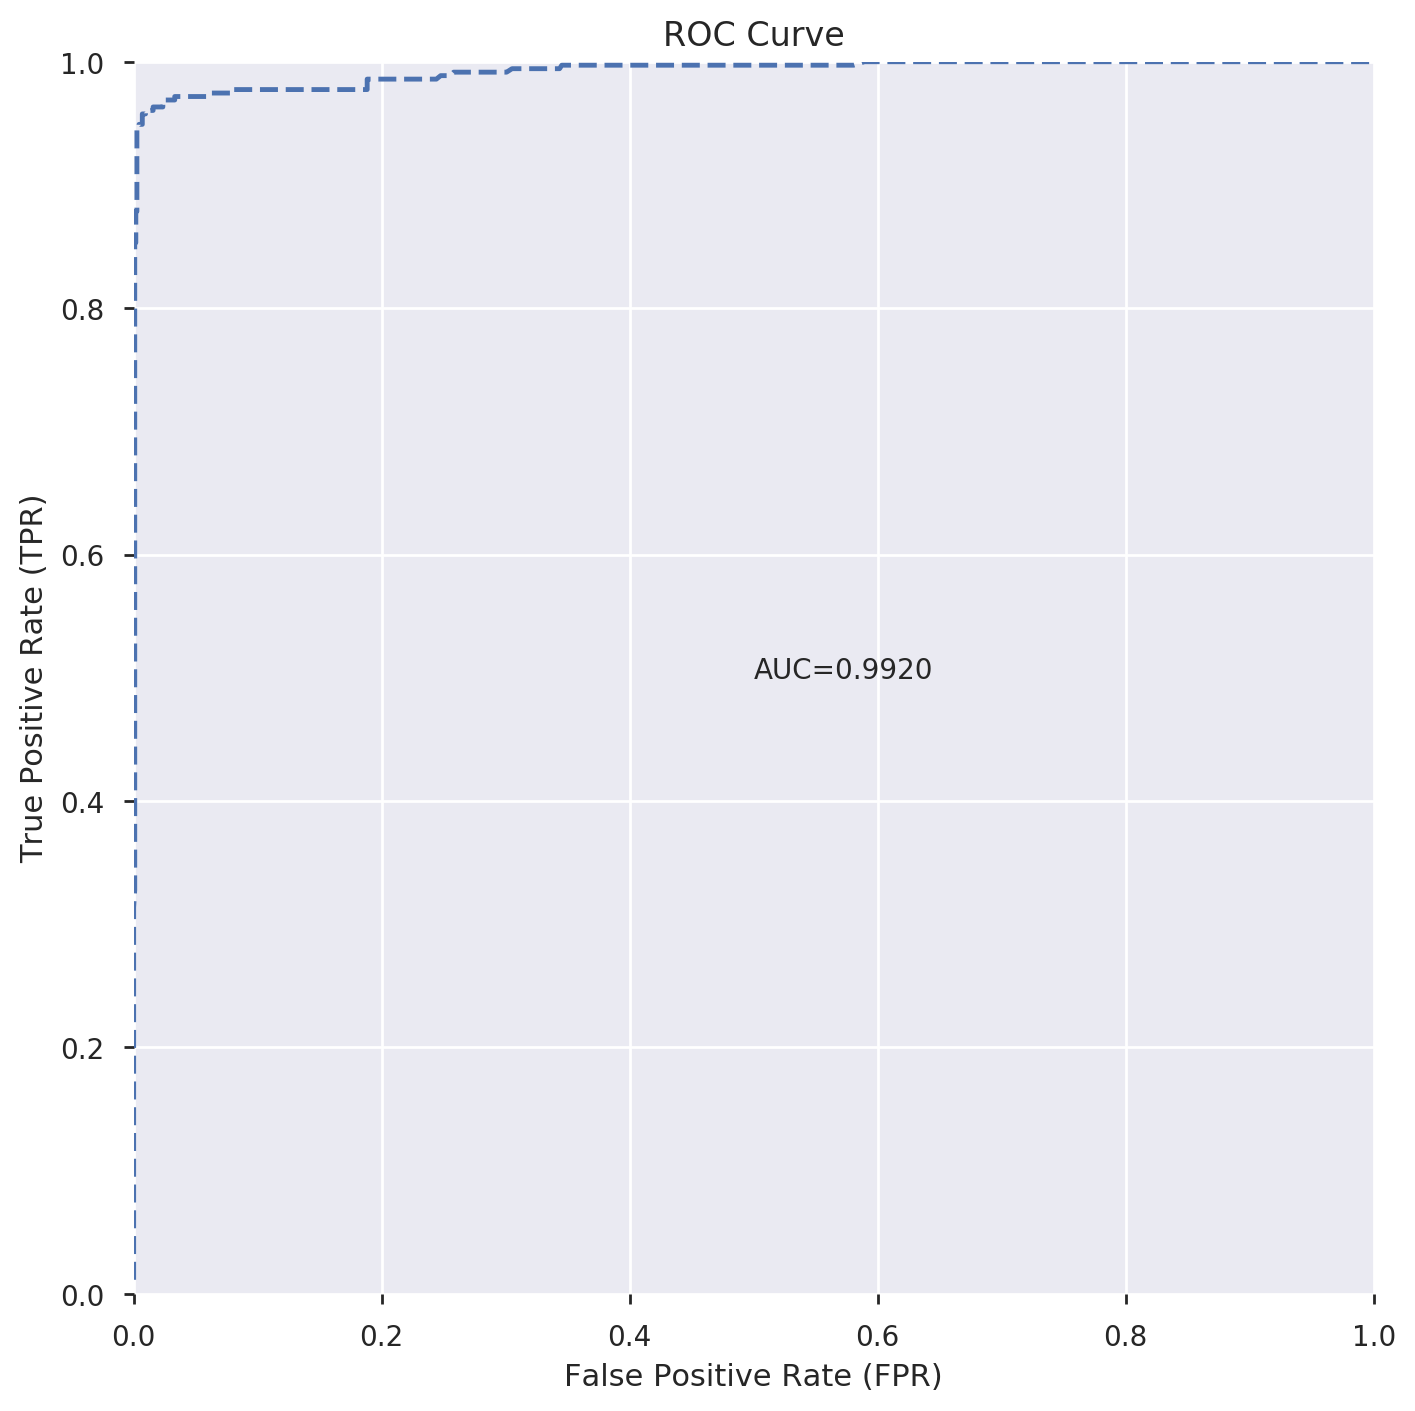

In [203]:
perf.plot()

In [99]:
compareML = H2OAutoML(max_models = 18, seed = 42, max_runtime_secs = 400)
compareML.train(x = predictors, y = response, training_frame = hr_hx)

compareML.leaderboard

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,mean_per_class_error,rmse,mse
GBM_grid_1_AutoML_20190108_222411_model_2,0.994059,0.0499866,0.0192172,0.101758,0.0103547
GBM_4_AutoML_20190108_222411,0.993872,0.0510674,0.019296,0.100262,0.0100524
GBM_3_AutoML_20190108_222411,0.993572,0.0518058,0.0180358,0.102277,0.0104605
XGBoost_grid_1_AutoML_20190108_222411_model_2,0.99336,0.0565642,0.0204861,0.107905,0.0116435
GBM_2_AutoML_20190108_222411,0.993307,0.0534865,0.0200135,0.105408,0.0111108
GBM_1_AutoML_20190108_222411,0.993212,0.0548777,0.02228,0.109521,0.0119948
XGBoost_1_AutoML_20190108_222411,0.993185,0.0663184,0.0335163,0.127714,0.0163109
GBM_5_AutoML_20190108_222411,0.992891,0.0617837,0.0279506,0.120709,0.0145707
StackedEnsemble_AllModels_AutoML_20190108_222411,0.99282,0.0496934,0.0183071,0.0996944,0.00993898
StackedEnsemble_BestOfFamily_AutoML_20190108_222411,0.992747,0.0499729,0.0194272,0.0999757,0.00999514


In [243]:
h2o.cluster().shutdown()